# DI 501 Project
### Ayça Durmuş
### 2740264

In [2]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from scipy.stats import mannwhitneyu
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
from sklearn.metrics import median_absolute_error
from scipy.stats import wilcoxon
from sklearn.metrics import mean_squared_error


In [3]:
##Data inspection for 2023

data=pd.read_csv("../data/dataset.csv")
print(data.columns)
print(len(data))
data.head(10)

Index(['_id', 'TARIH', 'YANGIN_TURU', 'YANGIN_SEBEBI', 'YANGIN_SONUCU',
       'YAPI_SEKLI', 'ERKEK_VEFAT', 'KADIN_VEFAT', 'ITFAIYECI_VEFAT',
       'ERKEK_YARALI', 'KADIN_YARALI', 'ITFAIYECI_YARALI', 'BUYUK_BAS_VEFAT',
       'KUCUK_BAS_VEFAT', 'KUMES_HAYVANI_VEFAT', 'EVCIL_HAYVAN_VEFAT',
       'DIGER HAYVAN', 'VARIS_SURESI (DAK.)', 'KULLANILAN_KOPUK_MIKTARI (KG)',
       'KULLANILAN_SU_MIKTARI (m3)',
       'KULLANILAN_KURU_KIMYEVI_TOZ_MIKTARI (KG)', 'EKIPLERIN_CIKIS_SAATI',
       'ILCE', 'ADRES_BOLGESI'],
      dtype='object')
12986


_id                TARIH YANGIN_TURU                    YANGIN_SEBEBI  \
0    1  2023-01-01 00:00:00        BİNA                   KIVILCIM(BACA)   
1    2  2023-01-01 00:00:00         ÇÖP                    SİGARA/KİBRİT   
2    3  2023-01-01 00:00:00        BİNA                          ŞÜPHELİ   
3    4  2023-01-01 00:00:00        ARAÇ                      KAZA SONUCU   
4    5  2023-01-01 00:00:00        ARAÇ               İHMAL/DİKKATSİZLİK   
5    6  2023-01-01 00:00:00         ÇÖP                    SİGARA/KİBRİT   
6    7  2023-01-01 00:00:00         ÇÖP                    SİGARA/KİBRİT   
7    8  2023-01-01 00:00:00        BİNA  ELEKT. KISA DEV./ELEKT. KONTAĞI   
8    9  2023-01-01 00:00:00         ÇÖP                        AÇIK ATEŞ   
9   10  2023-01-01 00:00:00        BİNA               İHMAL/DİKKATSİZLİK   

               YANGIN_SONUCU YAPI_SEKLI  ERKEK_VEFAT  KADIN_VEFAT  \
0     BAŞLANGIÇTA SÖNDÜRÜLEN  BETONARME            0            0   
1     BAŞLANGIÇTA SÖNDÜRÜLEN        NaN            0            0   
2     BAŞLANGIÇTA SÖNDÜRÜLEN  BETONARME            0            0   
3  KISMEN YANARAK KURTARILAN        NaN            0            0   
4     BAŞLANGIÇTA SÖNDÜRÜLEN        NaN            0            0   
5     BAŞLANGIÇTA SÖNDÜRÜLEN        NaN            0            0   
6     BAŞLANGIÇTA SÖNDÜRÜLEN        NaN            0            0   
7     BAŞLANGIÇTA SÖNDÜRÜLEN  BETONARME            0            0   
8     BAŞLANGIÇTA SÖNDÜRÜLEN        NaN            0            0   
9     BAŞLANGIÇTA SÖNDÜRÜLEN  BETONARME            0            1   

   ITFAIYECI_VEFAT  ERKEK_YARALI  ...  KUMES_HAYVANI_VEFAT  \
0                0             0  ...                    0   
1                0             0  ...                    0   
2                0             0  ...                    0   
3                0             0  ...                    0   
4                0             2  ...                    0   
5                0             0  ...                    0   
6                0             0  ...                    0   
7                0             0  ...                    0   
8                0             0  ...                    0   
9                0             0  ...                    0   

   EVCIL_HAYVAN_VEFAT  DIGER HAYVAN  VARIS_SURESI (DAK.)  \
0                   0             0                    4   
1                   0             0                    3   
2                   0             0                    2   
3                   0             0                    4   
4                   0             0                    6   
5                   0             0                    3   
6                   0             0                    8   
7                   0             0                    4   
8                   0             0                    9   
9                   0             0                    3   

   KULLANILAN_KOPUK_MIKTARI (KG)  KULLANILAN_SU_MIKTARI (m3)  \
0                            0.0                         1.0   
1                            0.0                         0.5   
2                            0.0                         0.0   
3                            0.0                         2.0   
4                            0.0                         0.4   
5                            0.0                         1.5   
6                            0.0                         1.0   
7                            0.0                         0.0   
8                            0.0                         0.5   
9                            0.0                         0.0   

   KULLANILAN_KURU_KIMYEVI_TOZ_MIKTARI (KG) EKIPLERIN_CIKIS_SAATI  \
0                                       0.0                 00:18   
1                                       0.0                 01:38   
2                                       0.0                 01:50   
3                                       0.0                 02:02   
4           

In [4]:
data.describe()

_id   ERKEK_VEFAT   KADIN_VEFAT  ITFAIYECI_VEFAT  \
count  12986.000000  12986.000000  12986.000000     12986.000000   
mean    6493.500000      0.001309      0.000539         0.000077   
std     3748.879633      0.038230      0.023212         0.008775   
min        1.000000      0.000000      0.000000         0.000000   
25%     3247.250000      0.000000      0.000000         0.000000   
50%     6493.500000      0.000000      0.000000         0.000000   
75%     9739.750000      0.000000      0.000000         0.000000   
max    12986.000000      2.000000      1.000000         1.000000   

       ERKEK_YARALI  KADIN_YARALI  ITFAIYECI_YARALI  BUYUK_BAS_VEFAT  \
count  12986.000000  12986.000000      12986.000000     12986.000000   
mean       0.012013      0.006700          0.001617         0.000231   
std        0.154043      0.111149          0.053356         0.019622   
min        0.000000      0.000000          0.000000         0.000000   
25%        0.000000      0.000000          0.000000         0.000000   
50%        0.000000      0.000000          0.000000         0.000000   
75%        0.000000      0.000000          0.000000         0.000000   
max        7.000000      6.000000          3.000000         2.000000   

       KUCUK_BAS_VEFAT  KUMES_HAYVANI_VEFAT  EVCIL_HAYVAN_VEFAT  DIGER HAYVAN  \
count     12986.000000         12986.000000        12986.000000  12986.000000   
mean          0.004697             2.129755            0.001925      0.024565   
std           0.359771           176.867171            0.120630      1.267258   
min           0.000000             0.000000            0.000000      0.000000   
25%           0.000000             0.000000            0.000000      0.000000   
50%           0.000000             0.000000            0.000000      0.000000   
75%           0.000000             0.000000            0.000000      0.000000   
max          40.000000         17500.000000           13.000000    124.000000   

       KULLANILAN_KOPUK_MIKTARI (KG)  KULLANILAN_SU_MIKTARI (m3)  \
count                   12986.000000                12983.000000   
mean                        5.549373                    4.044010   
std                       158.194392                   26.634735   
min                         0.000000                    0.000000   
25%                         0.000000                    0.200000   
50%                         0.000000                    1.000000   
75%                         0.000000                    2.000000   
max                     15000.000000                 1000.000000   

       KULLANILAN_KURU_KIMYEVI_TOZ_MIKTARI (KG)  
count                              12986.000000  
mean                                   0.281365  
std                                    2.967351  
min                                    0.000000  
25%                                    0.000000  
50%                                    0.000000  
75%                                    0.000000  
max                                  250.000000

* I won't remove outliers in general because outlier data points might be useful to detect casualties, as casualties are sparse in the dataset.
* Majority of the columns' values are either zero or very low values, leading to right-skewed data.

* Preprocessing: fixing some columns for readability and data entry issues.

In [5]:
#we do not need the id
data.drop(['_id'],axis=1,inplace=True)

#fixing column names
data.columns=[x.lower() for x in data.columns] 

#some column names are inconvenient. lets fix that
data.columns = [re.sub(r'\s.*', '', x) for x in data.columns]

#lets lower the cases for string values
string_values_23=["yangin_turu","yangin_sebebi","yangin_sonucu","yapi_sekli","ilce","adres_bolgesi"]
for col in string_values_23:
    data[col]=data[col].str.lower()

#varış süresi (arrival time) has entries that do not fit the format. lets fix that

data['varis_suresi'] = data['varis_suresi'].str.replace(r'^00:', '', regex=True).str.strip()

#Deleting the hour in the date because they are all zeros
data['tarih'] = data['tarih'].str.replace(r'\s*00:00:00', '', regex=True).str.strip()




In [6]:
#how empty is our data?
print(data.isnull().sum())
print(data.shape)


tarih                                     0
yangin_turu                               0
yangin_sebebi                             0
yangin_sonucu                             0
yapi_sekli                             9870
erkek_vefat                               0
kadin_vefat                               0
itfaiyeci_vefat                           0
erkek_yarali                              0
kadin_yarali                              0
itfaiyeci_yarali                          0
buyuk_bas_vefat                           0
kucuk_bas_vefat                           0
kumes_hayvani_vefat                       0
evcil_hayvan_vefat                        0
diger                                     0
varis_suresi                             11
kullanilan_kopuk_miktari                  0
kullanilan_su_miktari                     3
kullanilan_kuru_kimyevi_toz_miktari       0
ekiplerin_cikis_saati                     0
ilce                                      0
adres_bolgesi                   

* yapi_sekli (Structure type) is not relevant for fires that was not related to any structures. For the rest of the missing values, their numbers are small enough (11 and 3) to disregard them, instead of dealing with missing value imputation.
* I will replace the NaNs in the yapi_sekli with the string 'not applicable'

In [7]:
data.dropna(subset=['varis_suresi', 'kullanilan_su_miktari'], inplace=True) 
print(data.isnull().sum()) #checking if all the missing values are dropped

tarih                                     0
yangin_turu                               0
yangin_sebebi                             0
yangin_sonucu                             0
yapi_sekli                             9858
erkek_vefat                               0
kadin_vefat                               0
itfaiyeci_vefat                           0
erkek_yarali                              0
kadin_yarali                              0
itfaiyeci_yarali                          0
buyuk_bas_vefat                           0
kucuk_bas_vefat                           0
kumes_hayvani_vefat                       0
evcil_hayvan_vefat                        0
diger                                     0
varis_suresi                              0
kullanilan_kopuk_miktari                  0
kullanilan_su_miktari                     0
kullanilan_kuru_kimyevi_toz_miktari       0
ekiplerin_cikis_saati                     0
ilce                                      0
adres_bolgesi                   

In [8]:
#let's first make sure that yapi_sekli is missing because of the type of fire and not randomly
empty_yapi=data[data['yapi_sekli'].isna()==True]

print(empty_yapi['yangin_turu'].value_counts()) #the list confirms my above assumption

yangin_turu
ot                                    3773
çöp                                   3089
araç                                  1014
ağaç                                   313
kargilik                               207
orman/fi̇danlik                        194
trafo                                  161
bağ/bahçe                              153
kablo/di̇rek-elekt/tel vb              141
eki̇n/saman                            102
maki̇li̇k/çali                          81
lasti̇k                                 75
zeyti̇nli̇k                             69
hurda-açik alanda                       68
aniz                                    68
si̇gorta pano-bi̇nadan bağimsiz         58
di̇ğer                                  45
motosi̇klet                             44
açik alan depo                          42
odun/kömür-açik alanda                  33
gübre                                   26
park                                    22
i̇ş maki̇nesi̇                          20

In [9]:
data['yapi_sekli'] = data['yapi_sekli'].fillna('not applicable')
print(data.isnull().sum()) #we are done with all the missing values now

tarih                                  0
yangin_turu                            0
yangin_sebebi                          0
yangin_sonucu                          0
yapi_sekli                             0
erkek_vefat                            0
kadin_vefat                            0
itfaiyeci_vefat                        0
erkek_yarali                           0
kadin_yarali                           0
itfaiyeci_yarali                       0
buyuk_bas_vefat                        0
kucuk_bas_vefat                        0
kumes_hayvani_vefat                    0
evcil_hayvan_vefat                     0
diger                                  0
varis_suresi                           0
kullanilan_kopuk_miktari               0
kullanilan_su_miktari                  0
kullanilan_kuru_kimyevi_toz_miktari    0
ekiplerin_cikis_saati                  0
ilce                                   0
adres_bolgesi                          0
dtype: int64


* Let's convert date (tarih) to a format that can be useful for regression. Since I am not trying to do time-series prediction, I don't need a date-sensitive analysis. All the data points have the same year and I am not interested in creating a model that is complex enough to understand the connection between the days of the month and casualties. However, the season the fire happens in might be a useful indicator, so let's bin the data column according to the months.
* Here is how I am binning the seasons according to months:
* Winter: 12, 1, 2
* Spring: 3, 4, 5
* Summer: 6, 7, 8
* Fall: 9, 10, 11.
* This is a subjective, rough partitioning of the seasons. Other ways of binning, or altervative ways of using the data column exists.

In [10]:
print(data['tarih'])

0        2023-01-01
1        2023-01-01
2        2023-01-01
3        2023-01-01
4        2023-01-01
            ...    
12981    2023-12-31
12982    2023-12-31
12983    2023-12-31
12984    2023-12-31
12985    2023-12-31
Name: tarih, Length: 12972, dtype: object


In [11]:
data['tarih']= pd.to_datetime(data['tarih'])
data['month'] = data['tarih'].dt.month

conditions_m=[
    (data['month']>= 6 )& (data['month']<= 8 ),
    (data['month']== 12) | (data['month']== 1) | (data['month']== 2) ,
    (data['month']>= 9 )& (data['month']<= 11 ),
    (data['month']>= 3 )& (data['month']<= 5 )
]
choices_m= ['summer','winter','fall','spring']
data['season']= np.select(conditions_m,choices_m,default='error')
data.drop(['month'],axis=1,inplace=True)
data.drop(['tarih'],axis=1,inplace=True)

In [12]:
print(data['season'].value_counts())

season
summer    5095
fall      3631
winter    2237
spring    2009
Name: count, dtype: int64


* The time teams left the station (ekiplerin_cikis_saati) is not in a format we can use with machine learning models at the moment. I will bin the hours (morning, afternoon, evening, night) to have a clearer view of the data, and then one hot encode the strings.
* I encoded the time of the day as the following:
* From 06:00 to 12:00 : morning,
* From 12:01 to 17:59 : afternoon,
* From 18:00 to 24:00: evening,
* From 00:00 to 5:59: night.
* This is subjective and might or might not create bias in the model.

In [13]:
data['ekiplerin_cikis_saati']=data['ekiplerin_cikis_saati'].str.replace(':','')
data['ekiplerin_cikis_saati']=data['ekiplerin_cikis_saati'].astype(int)


conditions = [
    (data['ekiplerin_cikis_saati'] >= 600) & (data['ekiplerin_cikis_saati'] <= 1200),
    (data['ekiplerin_cikis_saati'] >= 1201) & (data['ekiplerin_cikis_saati'] <= 1759),
    (data['ekiplerin_cikis_saati'] >= 1800) & (data['ekiplerin_cikis_saati'] <= 2400),
    ((data['ekiplerin_cikis_saati'] >= 0) & (data['ekiplerin_cikis_saati'] <= 559))
]
choices = ['morning', 'afternoon', 'evening', 'night']

data['cikis_zamani']=np.select(conditions,choices, default='unknown')
data.drop(['ekiplerin_cikis_saati'],axis=1,inplace=True)

* Both my machine learning related research question and statistical model related research question is related to casualties. Since I am more concerned with the number of casualties rather than the gender/firefighter status of the casualties, I will combine the related columns for better analysis. I will also combine animal deaths into a single column. 

* I want to combine vefat (death) columns with yarali (wounded) columns as all of these columns are usually zero and while seperated, do not really help with the regression model.

In [14]:
harm_human_cols=['erkek_vefat', 'kadin_vefat', 'itfaiyeci_vefat','erkek_yarali','kadin_yarali','itfaiyeci_yarali']
harm_animal_cols=['buyuk_bas_vefat','kucuk_bas_vefat','kumes_hayvani_vefat','evcil_hayvan_vefat','diger']
for x in harm_human_cols:
    print(data[x].value_counts())


erkek_vefat
0    12956
1       15
2        1
Name: count, dtype: int64
kadin_vefat
0    12965
1        7
Name: count, dtype: int64
itfaiyeci_vefat
0    12971
1        1
Name: count, dtype: int64
erkek_yarali
0    12859
1       90
2       10
3       10
5        1
4        1
7        1
Name: count, dtype: int64
kadin_yarali
0    12909
1       45
2       16
4        1
6        1
Name: count, dtype: int64
itfaiyeci_yarali
0    12958
1        8
2        5
3        1
Name: count, dtype: int64


In [15]:
for y in harm_animal_cols:
    print(data[y].value_counts())

buyuk_bas_vefat
0    12970
2        1
1        1
Name: count, dtype: int64
kucuk_bas_vefat
0     12963
2         3
3         2
1         2
40        1
7         1
Name: count, dtype: int64
kumes_hayvani_vefat
0        12961
2            2
10           1
11           1
5            1
17500        1
60           1
20           1
12           1
35           1
10000        1
Name: count, dtype: int64
evcil_hayvan_vefat
0     12962
1         7
2         1
3         1
13        1
Name: count, dtype: int64
diger
0      12960
20         2
1          1
2          1
5          1
19         1
124        1
50         1
25         1
13         1
30         1
10         1
Name: count, dtype: int64


* As can be seen from the above, majority of the values in the casualty-related columns are zero, thus I will aggregate them as mentioned and then re-scale them for the animal column (after train/test split), as they have some severe outliers. 

In [16]:
# aggregating columns
data['harm_animal_total']= (data['buyuk_bas_vefat']+ data['kucuk_bas_vefat'] + data['kumes_hayvani_vefat'] + data['evcil_hayvan_vefat'] + data['diger'])
data['harm_human_total']=(data['erkek_vefat'] + data['kadin_vefat'] + data['itfaiyeci_vefat'] +data['erkek_yarali']+data['kadin_yarali']+ data['itfaiyeci_yarali'])
data.drop(columns=harm_animal_cols,inplace=True)
data.drop(columns=harm_human_cols,inplace=True) #dropping the columns as we no longer need them


* Since we have a more readable and complete dataset now, let's see the distribution of the values.

In [17]:
cat_values=['yangin_turu','yangin_sebebi','yangin_sonucu','yapi_sekli','ilce','adres_bolgesi','cikis_zamani','season']
#how to chart time series (tarih), çıkış saati
numeric_values=['varis_suresi','kullanilan_kopuk_miktari','kullanilan_su_miktari','kullanilan_kuru_kimyevi_toz_miktari','harm_human_total','harm_animal_total']

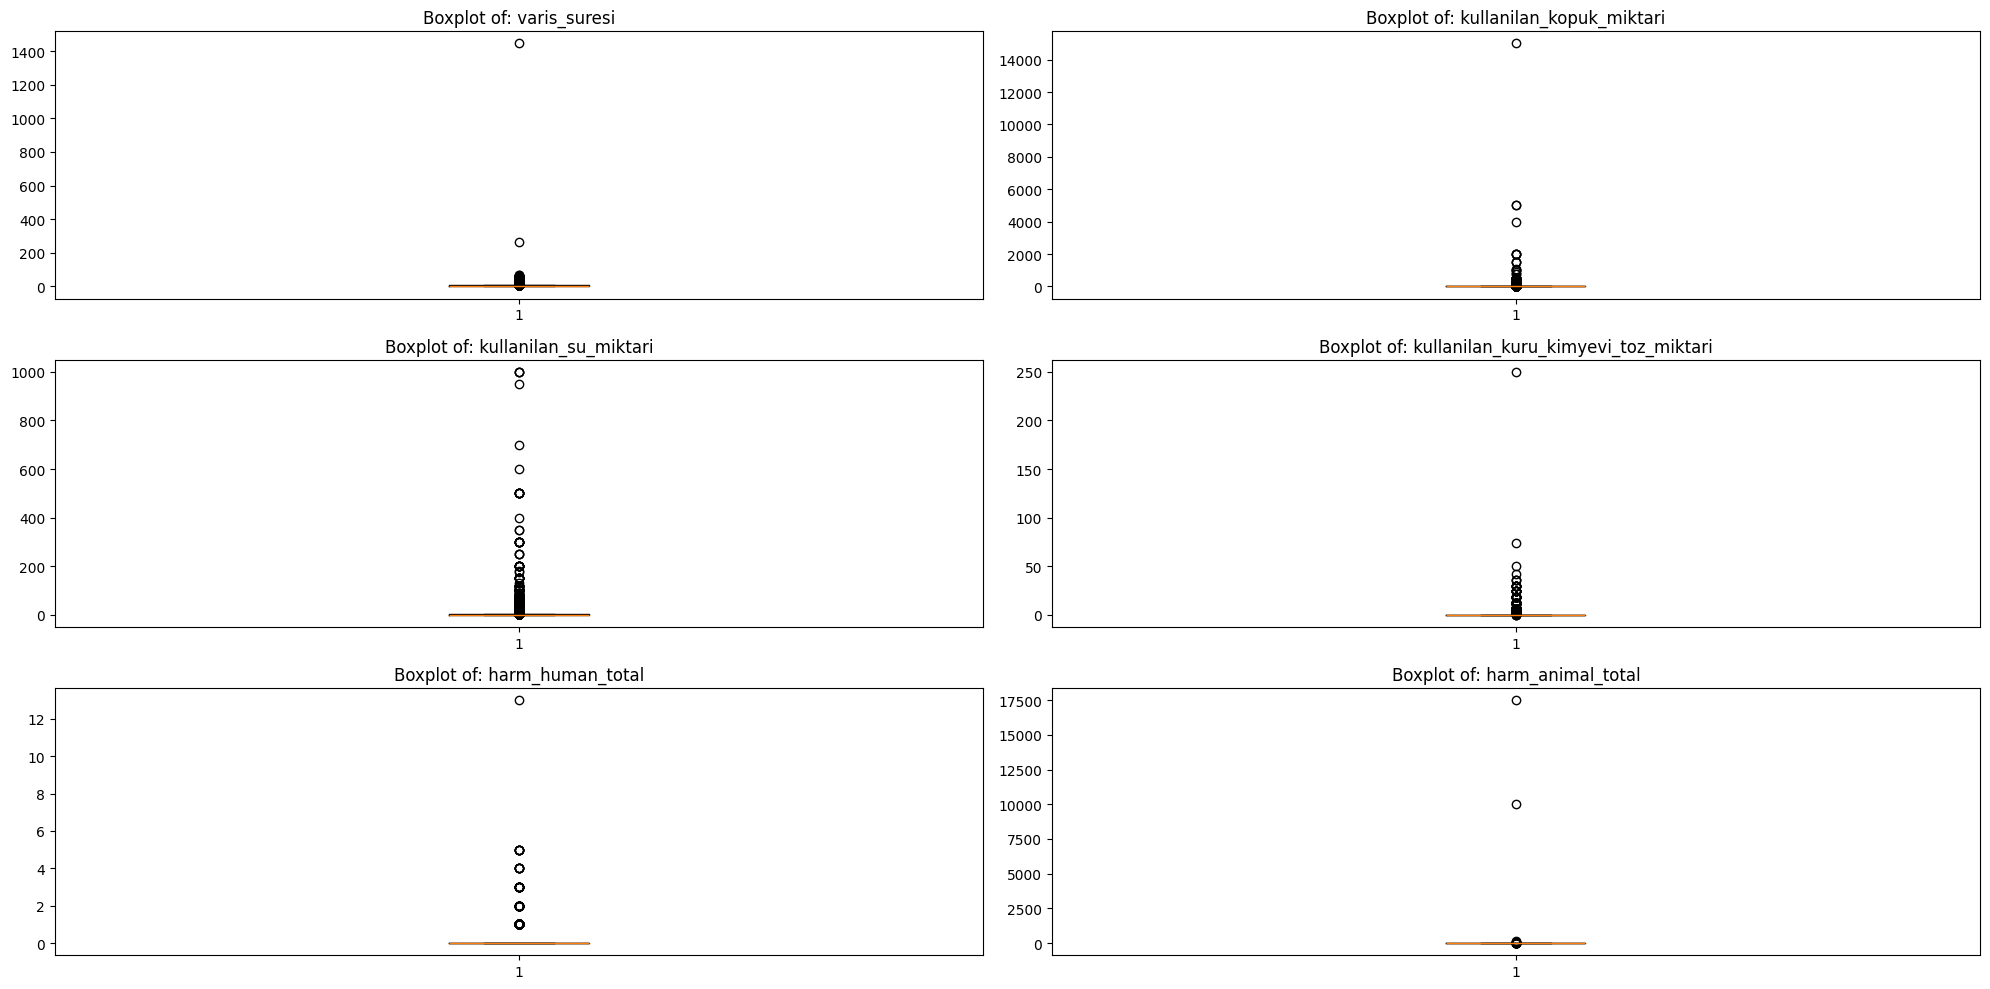

In [18]:
data['varis_suresi'] = data['varis_suresi'].astype(int) #while fixing the values with incorrect format, this turned into string, so lets fix that
fig,axes =plt.subplots(3,2,figsize=(20,10))
axes = axes.flatten()
for i,x in enumerate(numeric_values):
   axes[i].boxplot(data[x])
   axes[i].set_title(f"Boxplot of: {x}")
plt.tight_layout()
plt.show()

* As can be seen from the above charts, these values have some severe outliers. Let's see their statistics.

In [19]:
data[numeric_values].describe()

varis_suresi  kullanilan_kopuk_miktari  kullanilan_su_miktari  \
count  12972.000000              12972.000000           12972.000000   
mean       5.881745                  5.551508               4.045535   
std       13.607675                158.279162              26.645891   
min        0.000000                  0.000000               0.000000   
25%        3.000000                  0.000000               0.200000   
50%        5.000000                  0.000000               1.000000   
75%        6.000000                  0.000000               2.000000   
max     1445.000000              15000.000000            1000.000000   

       kullanilan_kuru_kimyevi_toz_miktari  harm_human_total  \
count                         12972.000000      12972.000000   
mean                              0.279356          0.022279   
std                               2.963074          0.244682   
min                               0.000000          0.000000   
25%                               0.000000          0.000000   
50%                               0.000000          0.000000   
75%                               0.000000          0.000000   
max                             250.000000         13.000000   

       harm_animal_total  
count       12972.000000  
mean            2.163506  
std           176.967160  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max         17500.000000

* As seen above, majority of the values in these columns can be found in 75% of the dataset, meaning majority of them are either zero or very low numbers. varis_suresi (arrival time in minutes) have an odd outlier, 1445 minutes, which I assume to be an entry error. I will remove that entry. 

In [20]:
data = data.drop(data[data['varis_suresi'] == 1445].index)

In [21]:
data['varis_suresi'].describe()

count    12971.000000
mean         5.770796
std          5.048749
min          0.000000
25%          3.000000
50%          5.000000
75%          6.000000
max        263.000000
Name: varis_suresi, dtype: float64

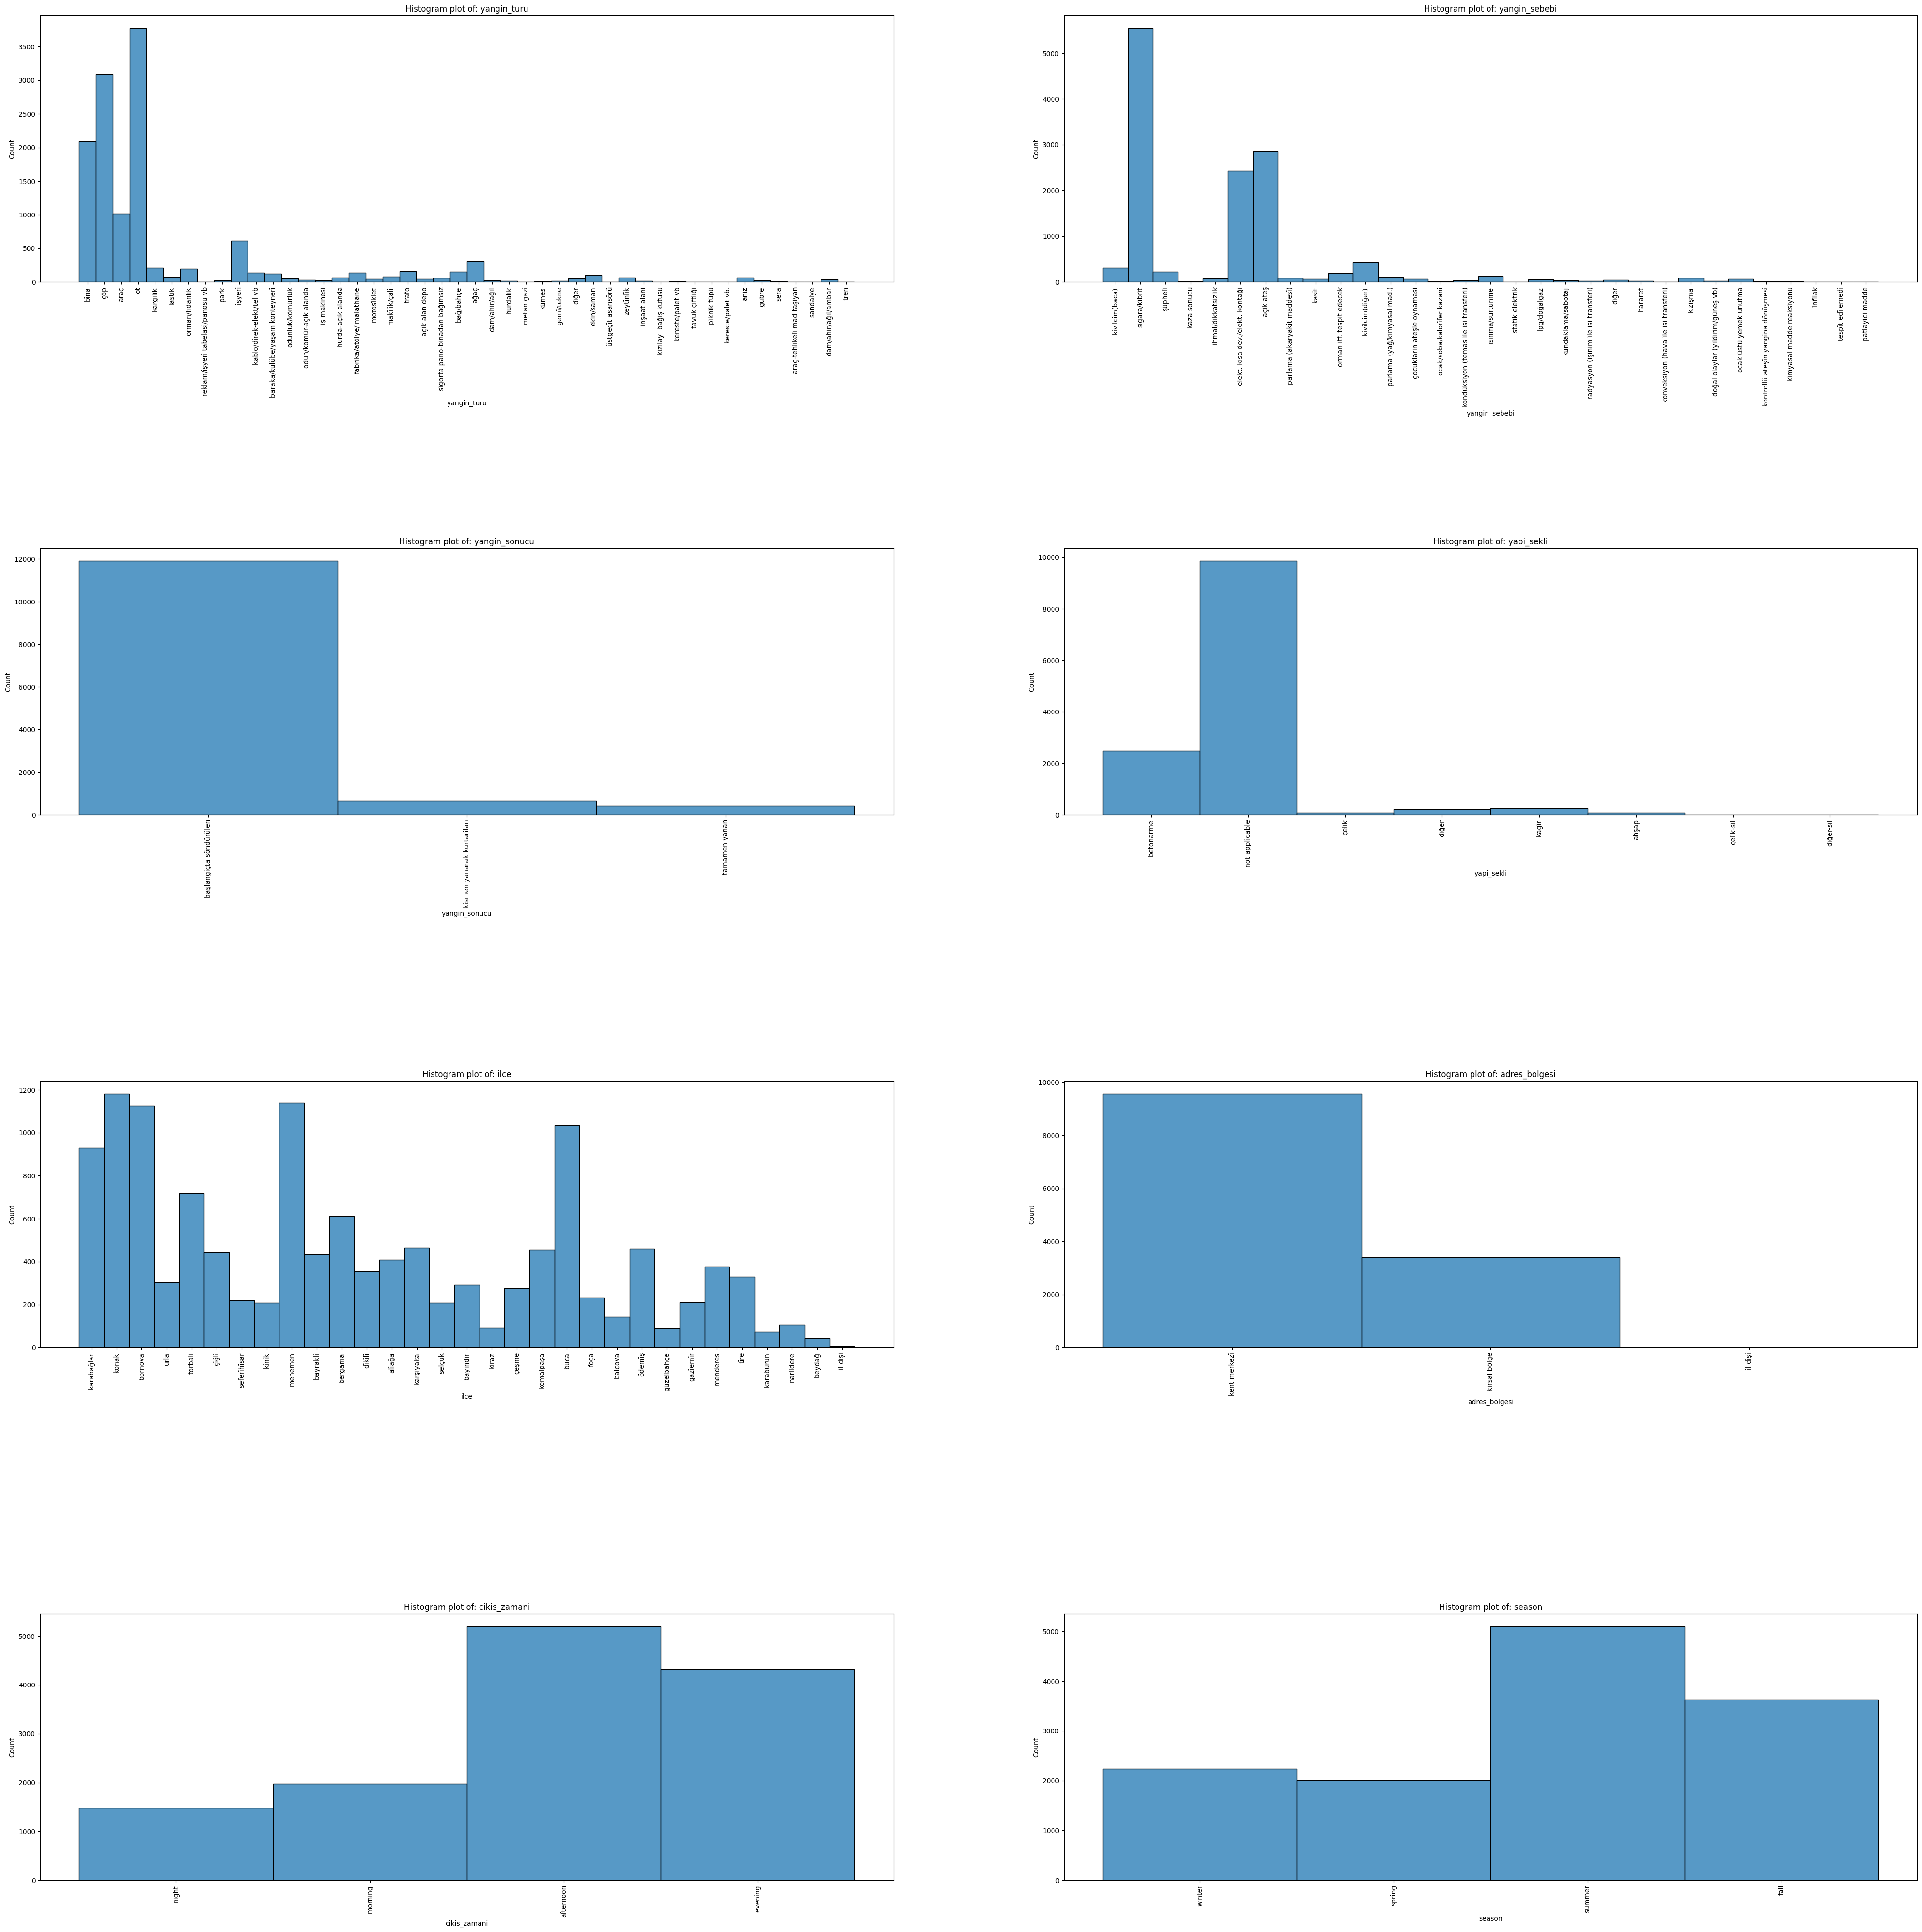

In [22]:
plt.figure(figsize=(50, 50))
plt.subplots_adjust(hspace=1) 
for i,x in enumerate(cat_values, 1):
    plt.subplot(4,2,i)
    sns.histplot(data[x])
    plt.title(f"Histogram plot of: {x}")
    plt.xticks(rotation=90)

* Structure, garbage, and grass are the most popular fire types in the database.
* An overwhelming majority of the fires are caused by cigarettes / matches, short circuiting electrical boxes, and open fire.
* An overwhelming majority of the fires have been put at the beginning.
* When a structure fire is involved, we see that the fires took place in reinforced concrete buildings (betonarme).
* The following districts had the most fires: Karabağlar, Konak, Bornova, Menemen, Buca.
* Majority of the fires took place in urban areas (kent_merkezi).
* The firefighters mostly left the station during afternoon and evening.
* Most popular seasons for the fires are summer and fall.

* None of the columns in the database seem to be following normal or uniform distribution. 

* The columns yangin_turu (Fire type) and yangin_sebebi (Cause of fire) both have a lot of string values that can be categorized together to create a more coherent analysis.
* yangin_turu lists the places or things that caught fire, while yangin_sebebi is about what caused the fire. These are both important information for the nature of the fire.
* Neither of these columns have values that make coherent sense: some of the values that seem separate might potentially overlap (e.g.: a fire can be caused by cigarattes and can be on purpose at the same time, but the database treats these causes as if they can't overlap). I tried to categorize yangin_turu and yangin_sebebi to best of my ability, but it is ultimately a subjective categorization.

In [23]:
data['yangin_turu'].value_counts()

yangin_turu
ot                                    3773
çöp                                   3090
bi̇na                                 2091
araç                                  1014
i̇şyeri̇                               614
ağaç                                   313
kargilik                               207
orman/fi̇danlik                        194
trafo                                  161
bağ/bahçe                              153
kablo/di̇rek-elekt/tel vb              141
fabri̇ka/atölye/i̇malathane            136
baraka/kulübe/yaşam konteyneri̇        124
eki̇n/saman                            102
maki̇li̇k/çali                          81
lasti̇k                                 75
zeyti̇nli̇k                             69
hurda-açik alanda                       68
aniz                                    68
si̇gorta pano-bi̇nadan bağimsiz         59
odunluk/kömürlük                        55
di̇ğer                                  54
motosi̇klet                             44

In [24]:
category_map = {
    # category 1: natural areas
    'ot': 'category 1',
    'orman/fi̇danlik': 'category 1',
    'kargilik': 'category 1',
    'ağaç': 'category 1',
    'maki̇li̇k/çali': 'category 1',
    'zeyti̇nli̇k': 'category 1',
    'bağ/bahçe': 'category 1',
    'eki̇n/saman': 'category 1',
    'aniz': 'category 1',

    # category 2: garbage and open air fires
    'çöp': 'category 2',
    'hurda-açik alanda': 'category 2',
    'hurdalik': 'category 2',
    'lasti̇k': 'category 2',
    'odun/kömür-açik alanda': 'category 2',
    'açik alan depo': 'category 2',

    # category 3: living spaces
    'bi̇na': 'category 3',
    'baraka/kulübe/yaşam konteyneri̇': 'category 3',

    # category 4: commercial and industrial
    'odunluk/kömürlük': 'category 4',
    'i̇şyeri̇': 'category 4',
    'fabri̇ka/atölye/i̇malathane': 'category 4',
    'i̇nşaat alani': 'category 4',
    'kereste/palet vb': 'category 4',
    'i̇ş maki̇nesi̇': 'category 4',

    # category 5: transportation
    'araç': 'category 5',
    'motosi̇klet': 'category 5',
    'tren': 'category 5',
    'gemi̇/tekne': 'category 5',
    'araç-tehli̇keli̇ mad taşiyan': 'category 5',

    # category 6: electrical/energy
    'trafo': 'category 6',
    'kablo/di̇rek-elekt/tel vb': 'category 6',
    'si̇gorta pano-bi̇nadan bağimsiz': 'category 6',

    # category 7: agriculture and animal husbandry
    'gübre': 'category 7',
    'tavuk çi̇ftli̇ği̇': 'category 7',
    'dam/ahir/ağil/ambar': 'category 7',
    'dam/ahir/ağil': 'category 7',
    'kümes': 'category 7',
    'sera': 'category 7',

    # category 8: park and recreation
    'park': 'category 8',
    'pi̇kni̇k tüpü': 'category 8',

    # category 9: other
    'kizilay  bağiş kutusu': 'category 9',
    'üstgeçi̇t asansörü': 'category 9',
    'sandalye': 'category 9',
    'di̇ğer': 'category 9',
    'reklam/i̇şyeri̇ tabelasi/panosu vb': 'category 9',
    'metan gazi': 'category 9'
}

# Apply the mapping
data['yangin_turu'] = data['yangin_turu'].map(category_map)


print(data['yangin_turu'].value_counts())


yangin_turu
category 1    4960
category 2    3321
category 3    2215
category 5    1078
category 4     850
category 6     361
category 7     101
category 9      60
category 8      24
Name: count, dtype: int64


In [25]:
data['yangin_sebebi'].value_counts()

yangin_sebebi
si̇gara/ki̇bri̇t                            5545
açik ateş                                   2857
elekt. kisa dev./elekt. kontaği             2425
kivilcim(di̇ğer)                             435
kivilcim(baca)                               305
şüpheli̇                                     223
orman i̇tf. tespi̇t edecek                   196
isinma/sürtünme                              132
parlama (yağ/ki̇myasal mad.)                 105
parlama (akaryakit maddesi̇)                  92
kizişma                                       83
i̇hmal/di̇kkatsi̇zli̇k                        78
kasit                                         64
çocuklarin ateşle oynamasi                    62
ocak üstü yemek unutma                        61
lpg/doğalgaz                                  53
di̇ğer                                        44
kundaklama/sabotaj                            38
kondüksi̇yon (temas i̇le isi transferi̇)      32
radyasyon (işinim i̇le isi transferi̇)        23
doğal 

In [26]:
category_map2={
    #category 1: unknown
    'tespi̇t edi̇lemedi̇': 'category 1',
    'şüpheli̇' : 'category 1',
    'orman i̇tf. tespi̇t edecek': 'category 1',
    'di̇ğer': 'category 1',

    #category 2: accident / neglect
    'i̇hmal/di̇kkatsi̇zli̇k' :'category 2',
    'kaza sonucu' :'category 2',
    'çocuklarin ateşle oynamasi' :'category 2',
    'ocak üstü yemek unutma':'category 2',
    'kontrollü ateşi̇n yangina dönüşmesi̇' :'category 2',
    'lpg/doğalgaz' :'category 2',
    'ocak/soba/kalori̇fer kazani' :'category 2',
    'patlayici madde' :'category 2',
    'stati̇k elektri̇k' :'category 2',
    'i̇nfi̇lak' :'category 2',
    'elekt. kisa dev./elekt. kontaği' :'category 2',

    #category 3: on purpose
    'kundaklama/sabotaj' :'category 3',
    'kasit' :'category 3',

    #category 4: natural causes
    'doğal olaylar (yildirim/güneş vb)' :'category 4',

    #category 5: fire / spark 
    'si̇gara/ki̇bri̇t' :'category 5',                            
    'açik ateş' :'category 5',
    'kivilcim(di̇ğer)' :'category 5',                             
    'kivilcim(baca)' :'category 5',
    'parlama (yağ/ki̇myasal mad.)' :'category 5',                 
    'parlama (akaryakit maddesi̇)' :'category 5',                              

    #category 6: heat / thermal causes
    'isinma/sürtünme' :'category 6',
    'hararet' :'category 6',
    'kizişma' :'category 6',
    'ki̇myasal madde reaksi̇yonu' :'category 6',
    'konveksi̇yon (hava i̇le isi transferi̇)' :'category 6',
    'kondüksi̇yon (temas i̇le isi transferi̇)' :'category 6',
    'radyasyon (işinim i̇le isi transferi̇)' :'category 6',
}
data['yangin_sebebi'] = data['yangin_sebebi'].map(category_map2)
data['yangin_sebebi'].value_counts()

yangin_sebebi
category 5    9339
category 2    2731
category 1     467
category 6     311
category 3     102
category 4      21
Name: count, dtype: int64

* Adress area is a binary categorical value, so let's encode it in a simple way.

In [27]:
data['adres_bolgesi'] = data['adres_bolgesi'].apply(lambda x: 1 if x == 'kent merkezi̇' else 0)
data['adres_bolgesi']=data['adres_bolgesi'].astype(bool)
print(data['adres_bolgesi'])

0         True
1         True
2         True
3         True
4         True
         ...  
12981     True
12982    False
12983     True
12984    False
12985    False
Name: adres_bolgesi, Length: 12971, dtype: bool


* For our statistical research question, we need the human_harm_total column and address area (adres_bolgesi), as we want to see if urban fires are more deadly than rural ones. However, we are about to one hot encode our data to prepare it for a regression model, thus we should copy a more simple version of our dataset now.

In [28]:
data_stat= data

* To use our categorical values with the regression model, we need to one-hot encode them. However, fitting before splitting data might lead to data leakages, thus we should seperate our data now.
* Since we have an unbalance dataset, I will use the target value for stratification.

In [29]:
print(data['harm_human_total'].value_counts())

harm_human_total
0     12794
1       121
2        28
3        15
5         6
4         6
13        1
Name: count, dtype: int64


In [30]:
#bin the target value (harm_human_total)
X, y = data.iloc[:,:-1], data.harm_human_total
binned_y = y.apply(lambda x: 0 if x == 0 else 1)
#split 80-10-10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=binned_y, random_state=2740264)
binned_y2 = y_test.apply(lambda x: 0 if x == 0 else 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,stratify=binned_y2, random_state=2740264)

In [31]:
print(binned_y.value_counts())

harm_human_total
0    12794
1      177
Name: count, dtype: int64


In [32]:
cat_values=['yangin_turu','yangin_sebebi','yangin_sonucu','yapi_sekli','ilce','cikis_zamani','season'] #removing address area because it is binary and was handled in a simpler way already
encoder = OneHotEncoder(sparse_output=False)
onehot = encoder.fit_transform(X_train[cat_values])
onehot_df_train = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(cat_values), index=X_train.index)
X_train = pd.concat([X_train.drop(columns=cat_values), onehot_df_train], axis=1)

onehot2=encoder.transform(X_test[cat_values])
onehot_df_test = pd.DataFrame(onehot2, columns=encoder.get_feature_names_out(cat_values), index=X_test.index)
X_test = pd.concat([X_test.drop(columns=cat_values), onehot_df_test], axis=1)

onehot3=encoder.transform(X_val[cat_values])
onehot_df_val = pd.DataFrame(onehot3, columns=encoder.get_feature_names_out(cat_values), index=X_val.index)
X_val = pd.concat([X_val.drop(columns=cat_values), onehot_df_val], axis=1)


In [33]:
# i need datasets that has been splitted but not scaled for decision tree models, so let's copy these
X_train_tree=X_train.copy()
y_train_tree= y_train.copy()
X_test_tree= X_test.copy()
y_test_tree=y_test.copy()
X_val_tree=X_val.copy()
y_val_tree=y_val.copy()

* As we have seen before, our numeric values are filled with outliers. I don't want to remove them because the outlier values might be valuable in an unbalanced database, as we have more fire incidents that did not result in injury / casualty than incidents that did. If we remove the outlier values in, for example, arrival time, we could lose important information as it may be related to predicting casualties. 
* However, we still need to scale our numeric data for a better model perfomance. Scikit-learn's Robust Scaler is not as sensitive to outliers like MinMaxScaler or StandartScaler, so we will use that.

In [34]:
numeric_values=['varis_suresi','kullanilan_kopuk_miktari','kullanilan_su_miktari','kullanilan_kuru_kimyevi_toz_miktari','harm_animal_total'] #taking out harm_human_total because 
# i dont want to standartize target variable

In [35]:
robusttransformer=RobustScaler()

train_scaled= robusttransformer.fit_transform(X_train[numeric_values])
scaled_df=pd.DataFrame(train_scaled,columns=numeric_values,index=X_train.index)
X_train = X_train.drop(columns=numeric_values).copy()
X_train[numeric_values] = scaled_df

test_scaled=robusttransformer.transform(X_test[numeric_values])
scaled_df2=pd.DataFrame(test_scaled, columns=numeric_values,index=X_test.index)
X_test=X_test.drop(columns=numeric_values).copy()
X_test[numeric_values]=scaled_df2

val_scaled=robusttransformer.transform(X_val[numeric_values])
scaled_df3=pd.DataFrame(val_scaled,columns=numeric_values,index=X_val.index)
X_val=X_val.drop(columns=numeric_values).copy()
X_val[numeric_values]=scaled_df3

* Since we have to one-hot encode our categorical variables before we can use it with a regression model, we ended up with a lot of columns. In order to make the model more efficient and easier to use, we will reduce the dimension of the data by applying PCA.

In [36]:
pca=PCA(n_components=10)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
X_val_pca=pca.transform(X_val)

* Now our dataset's dimension has been lowered to 10 principles components. Let's see if it gives a good result.

In [37]:
model=LinearRegression()
model.fit(X_train_pca,y_train)
y_pred=model.predict(X_test_pca)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.05832063782817219
R-squared: 0.019568510322731547


* While our MSE is low (0.05), our R-squared metric is too low (0.01). Let's experiment with different number of components.

In [38]:
components = []
mse_scores = []
r2_scores = []
for x in range(1,30):
    pca=PCA(n_components=x)
    X_train_pca_temp=pca.fit_transform(X_train)
    X_test_pca_temp=pca.transform(X_test)

    model=LinearRegression()
    model.fit(X_train_pca_temp,y_train)
    y_pred=model.predict(X_test_pca_temp)

    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    components.append(x)
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f"n_component: {x}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("***************************")
    if x==13: #we now know that this is the best PCA value, let's save it for later
        best_prediction=y_pred


n_component: 1
Mean Squared Error: 0.059488661191193844
R-squared: -6.719546565725487e-05
***************************
n_component: 2
Mean Squared Error: 0.05948772896196929
R-squared: -5.152370825922681e-05
***************************
n_component: 3
Mean Squared Error: 0.05961926909664604
R-squared: -0.0022628522361369807
***************************
n_component: 4
Mean Squared Error: 0.0596193503941733
R-squared: -0.0022642189333943463
***************************
n_component: 5
Mean Squared Error: 0.0595576353574307
R-squared: -0.0012267240145749092
***************************
n_component: 6
Mean Squared Error: 0.05843322591467624
R-squared: 0.01767578573188766
***************************
n_component: 7
Mean Squared Error: 0.058452924416817285
R-squared: 0.01734463311563106
***************************
n_component: 8
Mean Squared Error: 0.0584521577003584
R-squared: 0.017357522428710248
***************************
n_component: 9
Mean Squared Error: 0.058430119682768296
R-squared: 0.0177

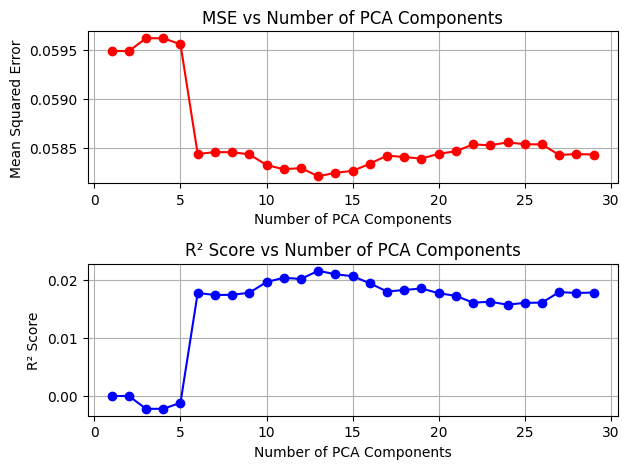

In [39]:
plt.subplot(2, 1, 1)
plt.plot(components, mse_scores, marker='o', color='red')
plt.title('MSE vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(components, r2_scores, marker='o', color='blue')
plt.title('R² Score vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.savefig('pca_results.png', dpi=300)
plt.show()


* It seems that our model is not working well at the moment. We can try to optimize our models in the second part of the project.
* MSE drops after 5 PCA componenets and the R-squared score peaks around 13.

* Setting aside machine learning for a second, let's see if urban fires are more deadly than rural fires.
* Since we know that our data is not normally distributed, we need to use a non-parametric test. We are comparing two independent group which means we need a non-paired test. Mann-Whitney U test is ideal for our case.
* First, let's prepare our data.

In [40]:
# We only need harm_human_total and adres_bolgesi (adress area)
# in adres bolgesi, True is kent merkezi (urban) and 0 is kırsal bölge (rural)
urban_set= data_stat[data_stat['adres_bolgesi']==True]
urban_harm=urban_set['harm_human_total']

rural_set=data_stat[data_stat['adres_bolgesi']==False]
rural_harm=rural_set['harm_human_total']

* Urban and rural sets have unequal sample sizes (rural= 3406, urban = 9565). It seems that Mann Whitney U test can handle this unequality.

* Let's make sure that the distribution of the human harm column did not change when it was seperated into urban and rural.

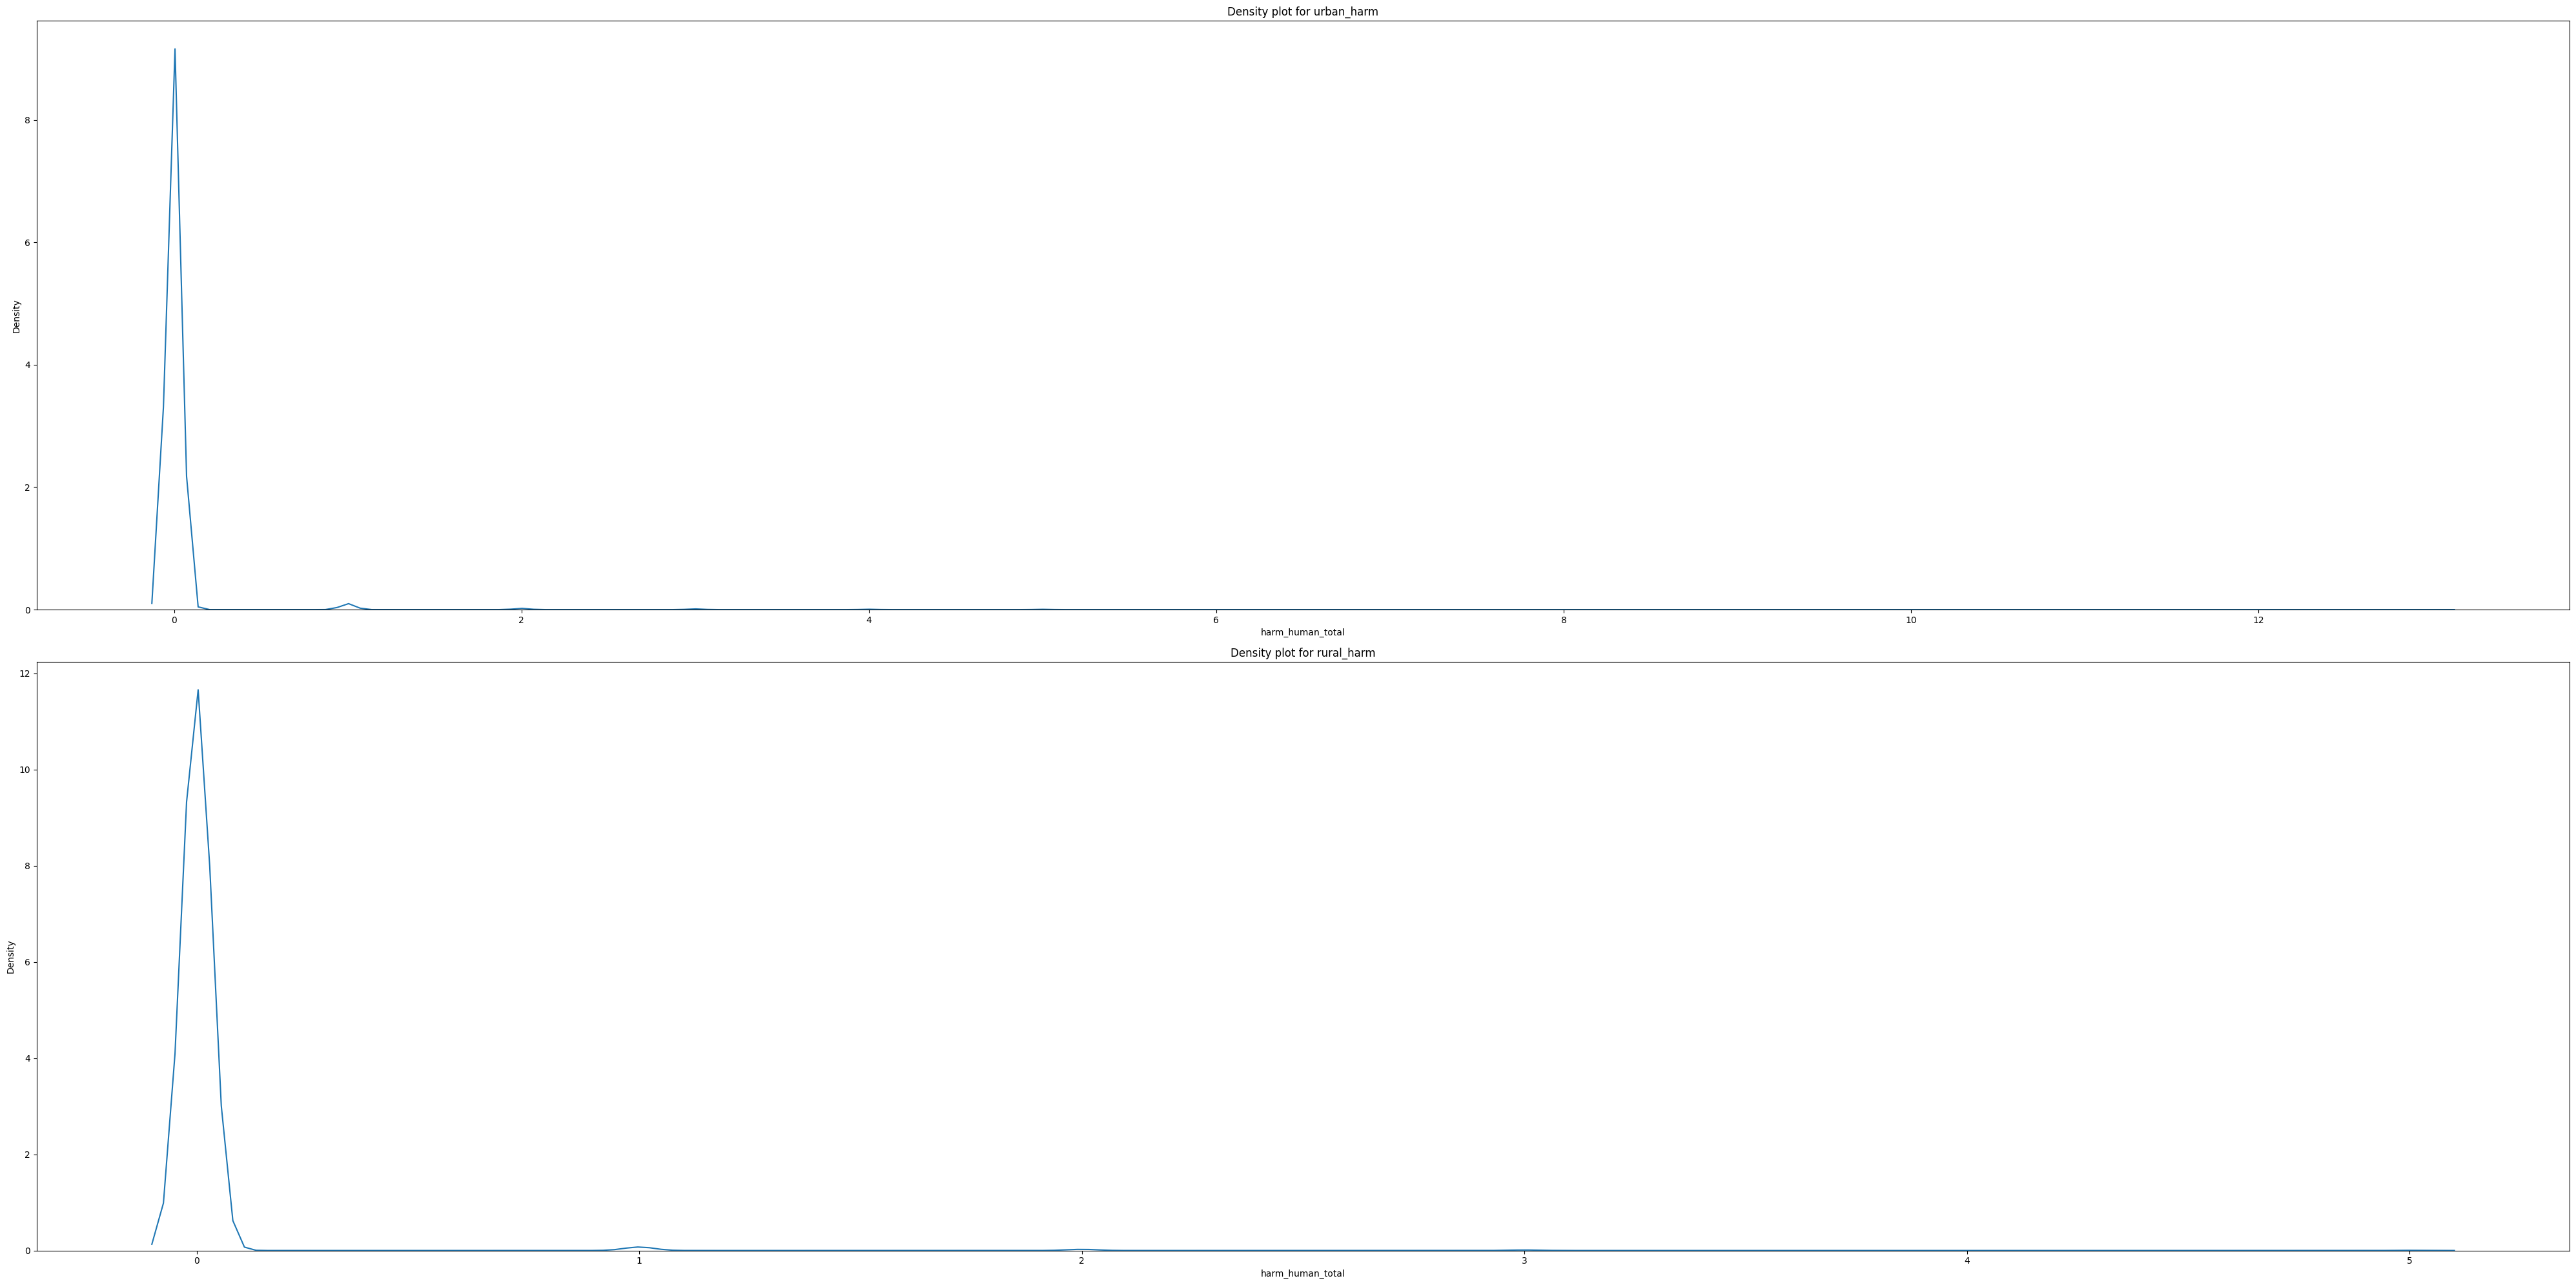

In [41]:
#Distribution of rural_harm and urban_harm
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=1)  
plt.subplot(2,1,1)
sns.kdeplot(urban_harm)
plt.title('Density plot for urban_harm')

plt.subplot(2,1,2)
sns.kdeplot(rural_harm)
plt.title('Density plot for rural_harm')

plt.tight_layout()
plt.show()

In [42]:
shapiro_urban=stats.shapiro(urban_harm)
shapiro_rural=stats.shapiro(rural_harm)

print(f"P-value for urban normalcy: {shapiro_urban.pvalue}")
print(f"P-value for rural normalcy: {shapiro_rural.pvalue}")

P-value for urban normalcy: 4.005558876333945e-112
P-value for rural normalcy: 1.7595911876576353e-84


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9565.
  res = hypotest_fun_out(*samples, **kwds)


* Since large samples make the Shapiro test unreliable (seen in the warning message), I will use random sampling instead.

In [43]:
np.random.seed(2740264)
urban_sample=np.random.choice(urban_harm,size=3000,replace=False)
rural_sample= np.random.choice(rural_harm,size=3000,replace=False)

shapiro_urban_sample=stats.shapiro(urban_sample)
shapiro_rural_sample=stats.shapiro(rural_sample)
print(f"P-value for urban normalcy: {shapiro_urban_sample.pvalue}")
print(f"P-value for rural normalcy: {shapiro_rural_sample.pvalue}")

P-value for urban normalcy: 8.400572983931984e-81
P-value for rural normalcy: 2.583151393686517e-81


* Both of the P-values are very low, so we can conclude that neither of them are normally distributed.

In [44]:
significance_level=0.05 #based on common and domain practice, check the paper for references
u_stat, p_value= mannwhitneyu(x=urban_harm,y=rural_harm, alternative='greater')
if p_value < significance_level:
    print("Urban fires do lead to more casualties / injuries.")
else:
    print("There is no difference between urban and rural fires in terms of casualty or injury number.")

Urban fires do lead to more casualties / injuries.


* We can conclude that, based on our test, urban fires lead to more casualties / injuries.

* To go back to our model: linear regression, based on the results we have seen previously, might not be suitable for our problem. We have seen very low R-squared scores and as seen below, even the best prediction set can not predict a number higher than or equal to 1.
* As a solution: We might need to try a model that can handle non-linear problems. For this project, I will try decision trees.

In [45]:
best_prediction.max()

np.float64(0.17739570123672938)

* Since we will try a decision tree instead, we don't need scaling. We will use the datasets we have saved before.
* I will consider the following hyperparameters for experimentation:
* Criterion: Determines the measure to be used while splitting.
* Splitter: Either 'random' or 'best', determines the strategy to use while splitting.
* Max_depth: Determines the maximum depth of the tree.
* Min_samples_split: Determines the minimum number of samples needed in a inner node for it to be split, can help with dealing with overfitting.
* Min_samples_leaf: Determines the minimum number of samples needed in each leaf node. Can help with dealing with overfitting.
* min_weight_fraction_leaf: Determines the minimum weighted fraction of the sum total of weights required to be at a leaf node. If there is no sample_weight provided, every sample is treated equal. As our target variable is quite unbalanced, I will give more weight to non-zero values to increase their importance in the model.
* Max_features: Determines the number of features to consider when deciding the best split.

* I am using mean absolute error for the random search metric because it is less sensitive to outliers.
* I am using the validation set for prediction and to see if the model can predict non-zero values. I am going to use a test set for a final test while comparing to baselines. I have created these sets before by using stratified split.

In [46]:
tree_reg=DecisionTreeRegressor(random_state=2740264) 
tree_grid={
'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
'splitter':['best','random'],
'max_depth':[5,10,15,20,15,30,35,40,50,60,70,80],
'min_samples_split':[2,4,8,16,32],
'min_samples_leaf':[1,2,4,8,16,32],
'min_weight_fraction_leaf' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
'max_features': [2,4,8,16,32]
}
tree_random_search=RandomizedSearchCV(estimator=tree_reg,param_distributions=tree_grid,n_iter=10000,scoring='neg_mean_absolute_error',
cv=5,n_jobs=10,return_train_score=True,refit=True,random_state=2740264)


* Since my data is unabalanced, I will give different weights to non-zero and zero target variables. Let's first see the percent of our non-zero values.

In [47]:
length = len(y_train_tree)
non_zero_count = (y_train_tree != 0).sum()
print(length)
print(non_zero_count)

10376
142


* Since non-zero values are around 1% of the total values, we will assign 1 for zero values and 100 for non-zero values as weight.
* In addition, I will get the log of the target variables to make the distribution of the target variable more normal-like. I used np.log1p (log of x+1) because it seems that it is better for normalizing skewed data, however log(x) could be used for similar purposes also.

In [48]:
weights = np.ones(len(y_train_tree))
non_zero_indices = y_train_tree > 0
weights[non_zero_indices] = 100

y_train_transformed = np.log1p(y_train_tree)

tree_random_search.fit(X_train_tree,y_train_transformed,sample_weight=weights)
tree_preds=tree_random_search.predict(X_val_tree)
final_pred=np.expm1(tree_preds)
print(final_pred.max())

1.0


* Although the model can still not predict values higher than 1, it is no longer only predicting zeros. Let's see its accuracy now using mean absolute error.

In [49]:
mean_absolute_error(y_val_tree,final_pred)

0.16653816499614496

* While this score might be low, it might be due to overwhelming majority of zero values and them being predicting correctly. We will need to compare this model to baseline models to see how accurate it really is.

* Let's visualize the model's splitting decisions to see the most important features.

[Text(0.5, 0.75, 'yangin_turu_category 3 <= 0.5\nabsolute_error = 0.409\nsamples = 10376\nvalue = 0.693'),
 Text(0.25, 0.25, 'absolute_error = 0.326\nsamples = 8609\nvalue = 0.0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'absolute_error = 0.263\nsamples = 1767\nvalue = 0.693'),
 Text(0.625, 0.5, '  False')]

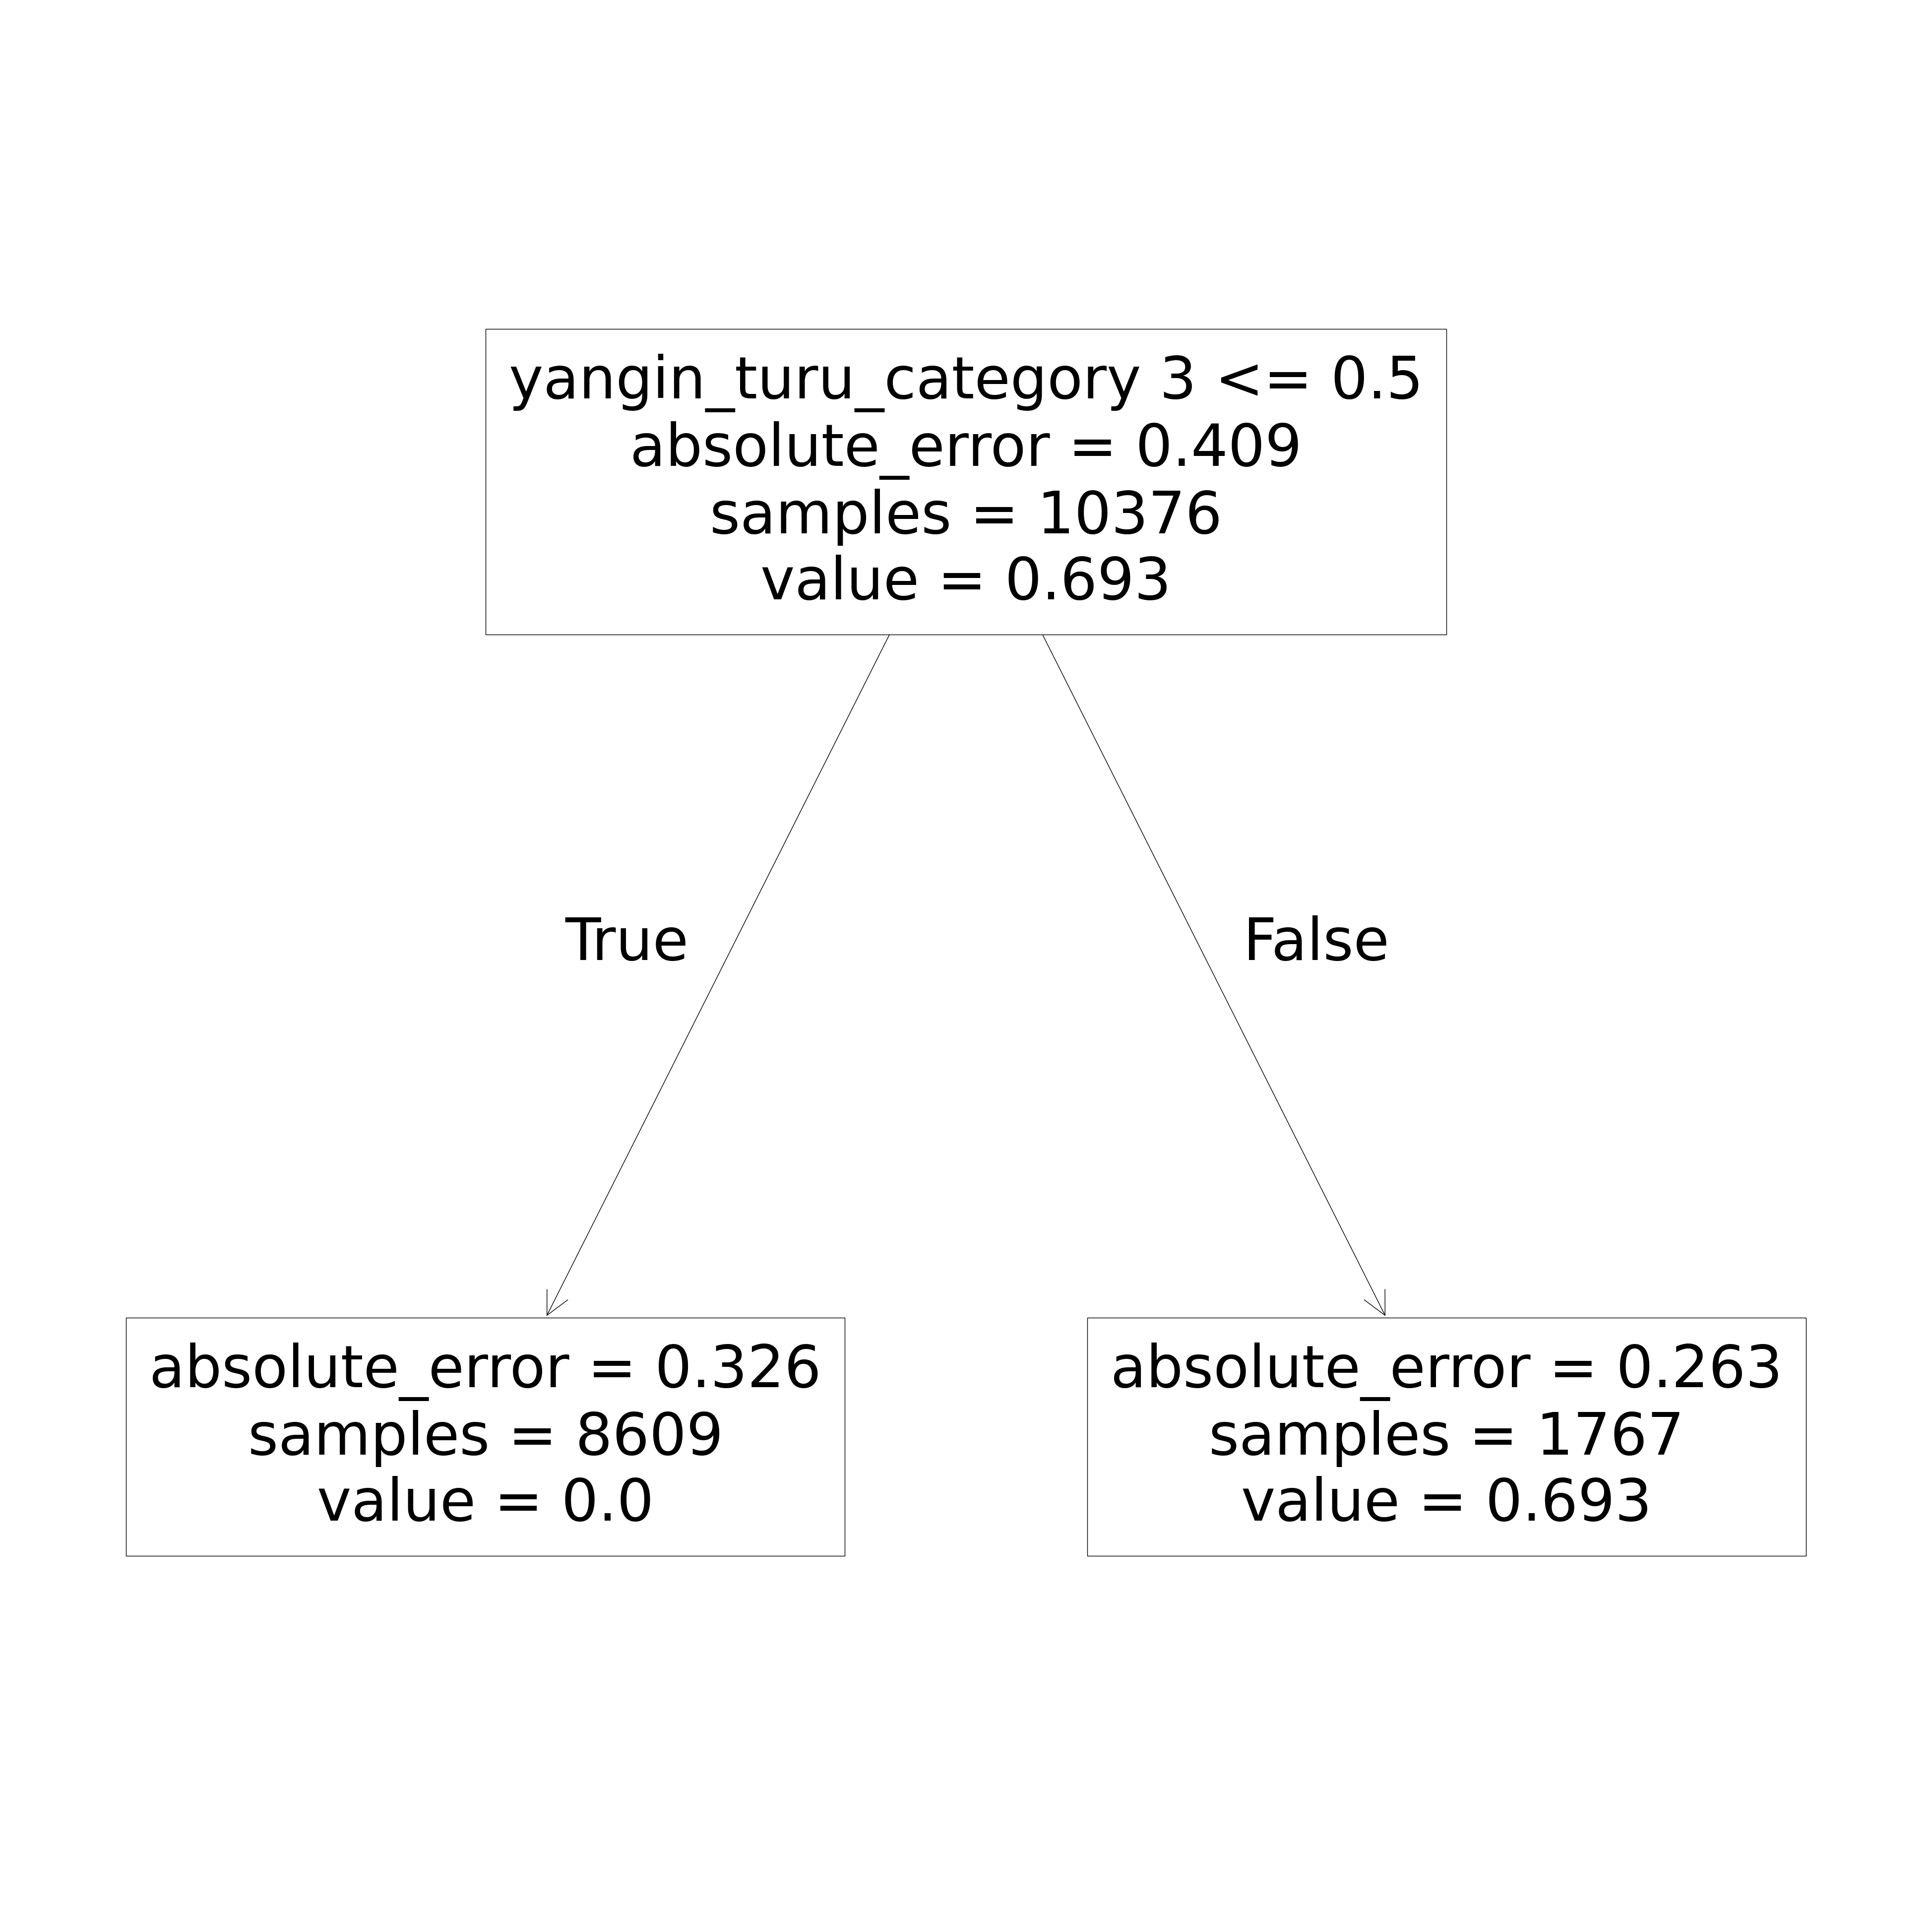

In [50]:
plt.figure(figsize=(50,50))
class_names=np.unique(y_train_transformed).astype(str)
best_tree = tree_random_search.best_estimator_
plot_tree(best_tree,feature_names=X_train_tree.columns, class_names=class_names)

In [51]:
np.expm1(0.693) #the training data uses log, so I am reversing it to see what the model actually predicted

np.float64(0.9997056605411638)

In [52]:
y_train_tree.unique() #this is the unique values that was present in the training data

array([ 0,  1,  3,  5,  2,  4, 13])

* From the tree we can see that the model can only do one split and it doesn't capture all the possible target variables.
* According to the tree, the most important (and unfortunately, the only) feature seems to be fire type. Fire type 3 is living spaces, which actually aligns with the literature that structure fires cause the most casualties: the model predicts 1 casualty if the fire type 3 is true.

* I will try to look for the best parameters again but this time, in order to increase the tree depth, I will decrease the minimum weight fraction leaf and decrease the weight given to non-zero values to 50. I am hoping that making these restrictions less aggresive will lead to a better tree that captures the complexity of the data better.

In [53]:
tree_reg2=DecisionTreeRegressor(random_state=2740264) 
tree_grid2={
'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
'splitter':['best','random'],
'max_depth':[5,10,15,20,15,30,35,40,50,60,70,80],
'min_samples_split':[2,4,8,16,32],
'min_samples_leaf':[1,2,4,8,16,32],
'min_weight_fraction_leaf' : [0.005,0.01,0.03,0.05, 0.10, 0.15, 0.20, 0.25, 0.30], #adding new values here
'max_features': [2,4,8,16,32]
}
tree_random_search2=RandomizedSearchCV(estimator=tree_reg2,param_distributions=tree_grid2,n_iter=10000,scoring='neg_mean_absolute_error',
cv=5,n_jobs=10,return_train_score=True,refit=True,random_state=2740264)

weights2 = np.ones(len(y_train_tree))
non_zero_indices2 = y_train_tree > 0
weights2[non_zero_indices2] = 50 #reducing the weight by half

tree_random_search2.fit(X_train_tree,y_train_transformed,sample_weight=weights2)
tree_preds2=tree_random_search2.predict(X_val_tree)
final_pred2=np.expm1(tree_preds2)
print(final_pred2.max())

0.0


* As seen above, the new model can only predict zeros again. Let's see how it performs as a tree.

[Text(0.5, 0.5, 'absolute_error = 0.368\nsamples = 10376\nvalue = 0.0')]

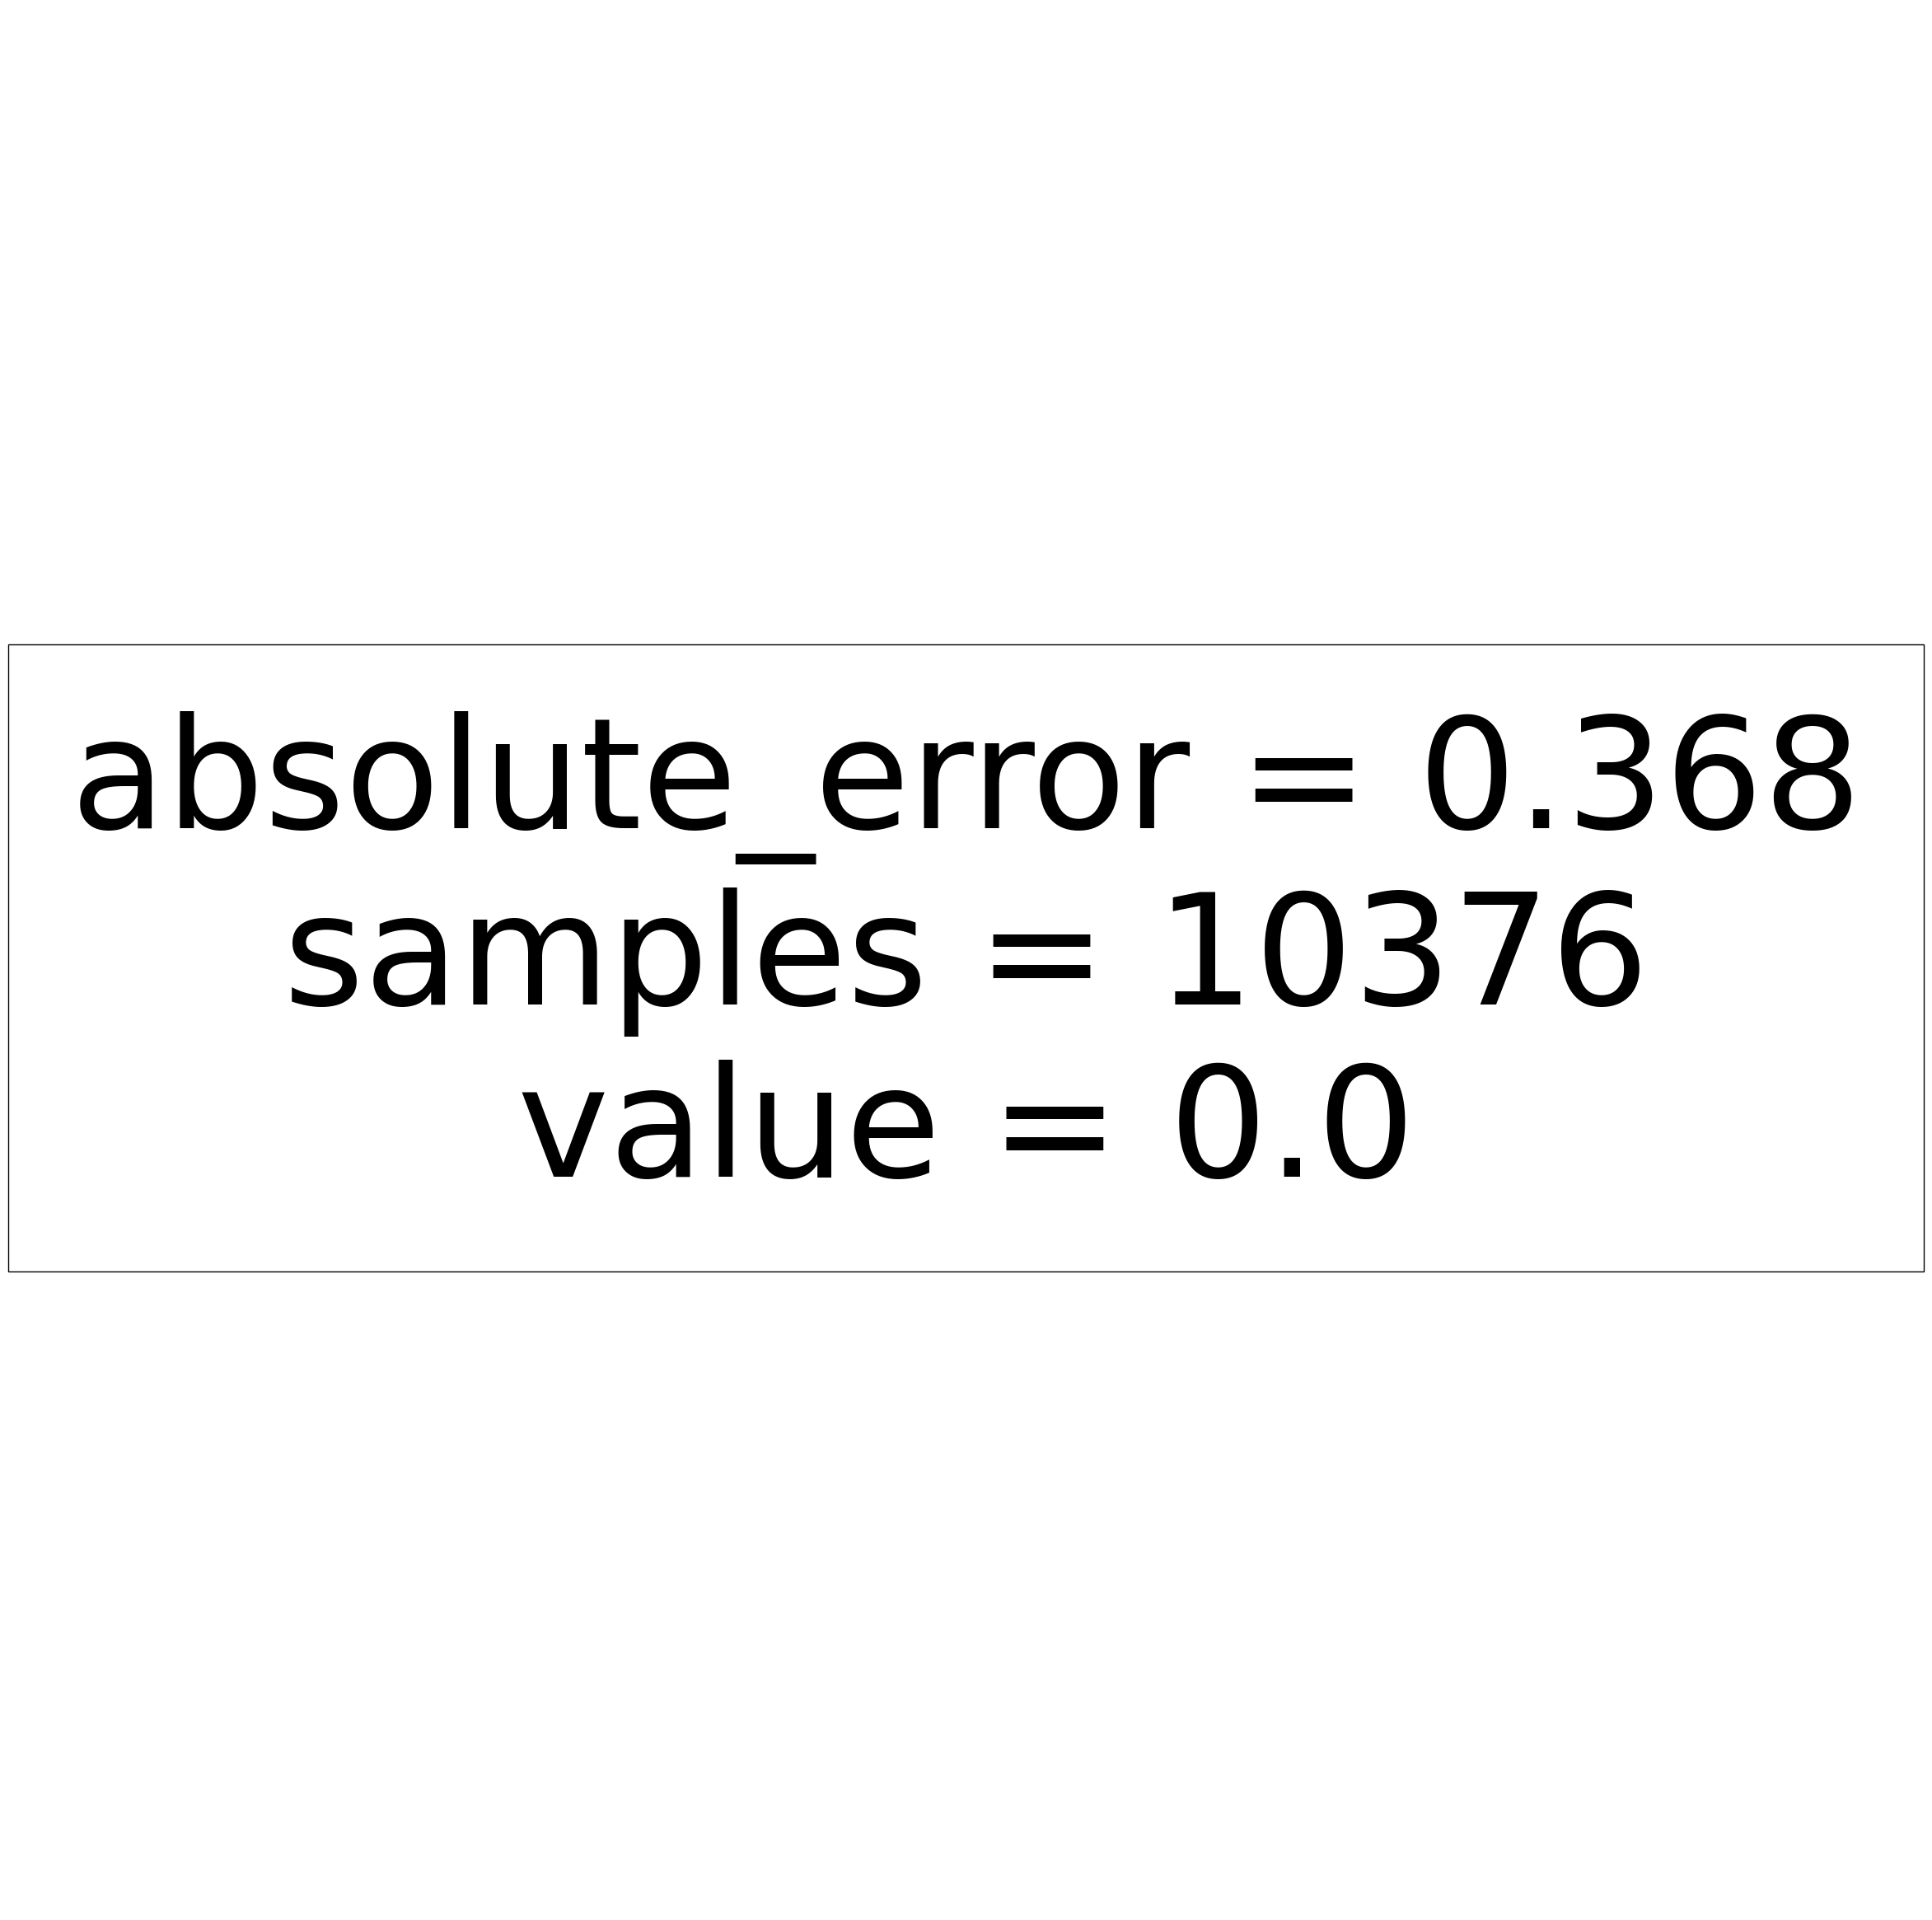

In [54]:
plt.figure(figsize=(30,30))
best_tree2 = tree_random_search2.best_estimator_
plot_tree(best_tree2,feature_names=X_train_tree.columns, class_names=class_names)

* As seen above, it is no longer a tree.
* Before moving on to the following sections, let's try a decision tree model without the sample weights. I will keep the same values I used for the second model except I won't use min_weight_fraction_leaf.

In [55]:
tree_reg3=DecisionTreeRegressor(random_state=2740264) 
tree_grid3={
'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
'splitter':['best','random'],
'max_depth':[5,10,15,20,15,30,35,40,50,60,70,80],
'min_samples_split':[2,4,8,16,32],
'min_samples_leaf':[1,2,4,8,16,32],
'max_features': [2,4,8,16,32]
} #omitting min_weight_fraction_leaf

tree_random_search3=RandomizedSearchCV(estimator=tree_reg3,param_distributions=tree_grid3,n_iter=10000,scoring='neg_mean_absolute_error',
cv=5,n_jobs=10,return_train_score=True,refit=True,random_state=2740264)

tree_random_search3.fit(X_train_tree,y_train_transformed) #no weights
tree_preds3=tree_random_search3.predict(X_val_tree)
final_pred3=np.expm1(tree_preds3)
print(final_pred3.max())

0.0


* As seen above, the third model can predict zero maximum again. Let's see if this one is a tree.

In [56]:
from joblib import load #loaded the best models from all 3 experiments here to save time

#best_tree_model1 = load('../joblib_models/tree_random_search.joblib')
#best_tree_model3 = load('../joblib_models/tree_random_search3.joblib')

#tree_random_search = load('../joblib_models/tree_random_search.joblib')
#tree_random_search2 = load('../joblib_models/tree_random_search2.joblib')
#tree_random_search3 = load('../joblib_models/tree_random_search3.joblib')

In [57]:
plt.figure(figsize=(150,150))
best_model_3= tree_random_search3.best_estimator_
plot_tree(best_model_3,feature_names=X_train_tree.columns, class_names=class_names)
plt.show()

In [58]:
#tree_preds3=best_tree_model3.predict(X_val_tree) #redid the predictions of the third model here again without fitting the original model to see the results again
tree_preds3=tree_random_search3.predict(X_val_tree)
final_pred3=np.expm1(tree_preds3)
print(final_pred3.max())
np.unique(final_pred3)

0.0


array([0.])

* Although it can only predict zeros again, this time we have a more complicated tree. Due to the time constraints, I won't experiment further.
* Similar to model 1, model 3 claims that fire type category 3 is the most important split point. It is followed by:
* Level 2: If category 3 is less than 0.5 (meaning it is not a structural and/or living space fire), then the model checks for if the fire took place in Urla. If category 3 is 1, then it checks for the amount of water used.
* We can analyse the model further, however since every decision point leads to zero, I am not sure how logical it would be to consider these splitting criterias as important. However, maybe we can interpret these decision points as the tree model's attempt at clustering the fire types?

* Let's see the best parameters for all 3 models.

In [59]:
print(tree_random_search.best_params_)
print("*********************")
print(tree_random_search2.best_params_)
print("*********************")
print(tree_random_search3.best_params_)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.3, 'min_samples_split': 16, 'min_samples_leaf': 16, 'max_features': 8, 'max_depth': 70, 'criterion': 'absolute_error'}
*********************
{'splitter': 'random', 'min_weight_fraction_leaf': 0.3, 'min_samples_split': 16, 'min_samples_leaf': 16, 'max_features': 2, 'max_depth': 40, 'criterion': 'absolute_error'}
*********************
{'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 60, 'criterion': 'absolute_error'}


* Let's move on to interpretability. 

In [60]:
importances1=tree_random_search.best_estimator_.feature_importances_
feature_names=X_train_tree.columns
for name, importance in zip(feature_names, importances1):
    print(f"Feature: {name}, Score: {importance:.5f}")
importances1.nonzero()

Feature: varis_suresi, Score: 0.00000
Feature: kullanilan_kopuk_miktari, Score: 0.00000
Feature: kullanilan_su_miktari, Score: 0.00000
Feature: kullanilan_kuru_kimyevi_toz_miktari, Score: 0.00000
Feature: adres_bolgesi, Score: 0.00000
Feature: harm_animal_total, Score: 0.00000
Feature: yangin_turu_category 1, Score: 0.00000
Feature: yangin_turu_category 2, Score: 0.00000
Feature: yangin_turu_category 3, Score: 1.00000
Feature: yangin_turu_category 4, Score: 0.00000
Feature: yangin_turu_category 5, Score: 0.00000
Feature: yangin_turu_category 6, Score: 0.00000
Feature: yangin_turu_category 7, Score: 0.00000
Feature: yangin_turu_category 8, Score: 0.00000
Feature: yangin_turu_category 9, Score: 0.00000
Feature: yangin_turu_nan, Score: 0.00000
Feature: yangin_sebebi_category 1, Score: 0.00000
Feature: yangin_sebebi_category 2, Score: 0.00000
Feature: yangin_sebebi_category 3, Score: 0.00000
Feature: yangin_sebebi_category 4, Score: 0.00000
Feature: yangin_sebebi_category 5, Score: 0.00000

(array([8]),)

* As seen above, the only feature that is being given importance in model 1 is yangin_turu_category 3. We have seen this before in the tree plot also.

In [61]:
importances2=tree_random_search2.best_estimator_.feature_importances_
feature_names=X_train_tree.columns
for name, importance in zip(feature_names, importances2):
    print(f"Feature: {name}, Score: {importance:.5f}")
importances2.nonzero()

Feature: varis_suresi, Score: 0.00000
Feature: kullanilan_kopuk_miktari, Score: 0.00000
Feature: kullanilan_su_miktari, Score: 0.00000
Feature: kullanilan_kuru_kimyevi_toz_miktari, Score: 0.00000
Feature: adres_bolgesi, Score: 0.00000
Feature: harm_animal_total, Score: 0.00000
Feature: yangin_turu_category 1, Score: 0.00000
Feature: yangin_turu_category 2, Score: 0.00000
Feature: yangin_turu_category 3, Score: 0.00000
Feature: yangin_turu_category 4, Score: 0.00000
Feature: yangin_turu_category 5, Score: 0.00000
Feature: yangin_turu_category 6, Score: 0.00000
Feature: yangin_turu_category 7, Score: 0.00000
Feature: yangin_turu_category 8, Score: 0.00000
Feature: yangin_turu_category 9, Score: 0.00000
Feature: yangin_turu_nan, Score: 0.00000
Feature: yangin_sebebi_category 1, Score: 0.00000
Feature: yangin_sebebi_category 2, Score: 0.00000
Feature: yangin_sebebi_category 3, Score: 0.00000
Feature: yangin_sebebi_category 4, Score: 0.00000
Feature: yangin_sebebi_category 5, Score: 0.00000

(array([], dtype=int64),)

* As expected from the plot tree, model 2 doesn't give any importance to any of the features.

In [62]:
importances3=tree_random_search3.best_estimator_.feature_importances_
feature_names=X_train_tree.columns
for name, importance in zip(feature_names, importances3):
    print(f"Feature: {name}, Score: {importance:.5f}")

Feature: varis_suresi, Score: -0.01333
Feature: kullanilan_kopuk_miktari, Score: 0.00857
Feature: kullanilan_su_miktari, Score: 0.59429
Feature: kullanilan_kuru_kimyevi_toz_miktari, Score: 0.00000
Feature: adres_bolgesi, Score: -0.00762
Feature: harm_animal_total, Score: 0.00000
Feature: yangin_turu_category 1, Score: 0.00000
Feature: yangin_turu_category 2, Score: -0.01429
Feature: yangin_turu_category 3, Score: 0.60952
Feature: yangin_turu_category 4, Score: 0.00000
Feature: yangin_turu_category 5, Score: 0.00000
Feature: yangin_turu_category 6, Score: 0.00000
Feature: yangin_turu_category 7, Score: 0.00000
Feature: yangin_turu_category 8, Score: 0.00000
Feature: yangin_turu_category 9, Score: 0.00000
Feature: yangin_turu_nan, Score: 0.00000
Feature: yangin_sebebi_category 1, Score: 0.00000
Feature: yangin_sebebi_category 2, Score: 0.00857
Feature: yangin_sebebi_category 3, Score: 0.00000
Feature: yangin_sebebi_category 4, Score: 0.00000
Feature: yangin_sebebi_category 5, Score: -0.0

* In model 3, we have a lot of non-zero feature importance values. Let's print them seperately.

In [63]:
sorted_features = sorted(zip(feature_names, importances3), key=lambda x: x[1], reverse=True)
for name, importance in sorted_features:
    if importance > 0:
        print(f"Feature: {name}, Score: {importance:.5f}")

Feature: yangin_turu_category 3, Score: 0.60952
Feature: kullanilan_su_miktari, Score: 0.59429
Feature: cikis_zamani_afternoon, Score: 0.23619
Feature: yangin_sonucu_başlangiçta söndürülen, Score: 0.15238
Feature: ilce_güzelbahçe, Score: 0.02952
Feature: yangin_sebebi_category 6, Score: 0.01333
Feature: ilce_karabağlar, Score: 0.01143
Feature: kullanilan_kopuk_miktari, Score: 0.00857
Feature: yangin_sebebi_category 2, Score: 0.00857
Feature: yapi_sekli_betonarme, Score: 0.00762
Feature: season_summer, Score: 0.00476
Feature: season_spring, Score: 0.00381
Feature: yangin_sonucu_kismen yanarak kurtarilan, Score: 0.00190
Feature: ilce_çi̇ğli̇, Score: 0.00190
Feature: cikis_zamani_morning, Score: 0.00190
Feature: yapi_sekli_kagi̇r, Score: 0.00095
Feature: yapi_sekli_not applicable, Score: 0.00095


* Above, we can see model 3's feature importance values. Similar to model 1, yanging_turu_category 3 is again given the highest importance. It is followed by water used, the departure time of the firefighters (afternoon), if the fire was put out in the beginning, etc. 
* Refer to the paper for the comparison between the models' feature importance values and the important feature found in literature.

* I will choose model 1 to compare with a baseline, as it is the only model that can produce non-zero predictions.

In [64]:
#test_predictions=best_tree_model1.predict(X_test_tree) #creating predictions using the test set
test_predictions=tree_random_search.predict(X_test_tree)

* Since my target variable is highly skewed, I will use mean absolute error and mean squared error to evaluate my model against a naive baseline.
* Since the majority of the target variable is zero, I will create a baseline that predicts zero for all cases.
* MAE is more robust to outliers, so outliers won't affect the score too much. I chose mean squared error as the second metric because I want to see how much non-zero values are predicted (in)correctly in my model, as squaring the error means we penalize higher errors more.

* I will create arrays that have the absolute errors and squared errors of the baseline and my model. Then I will check if there is a statistically significant difference in terms of distribution between them.

In [65]:
#create a baseline model
y_base=np.zeros_like(y_test_tree)
#for statistical test
test_ae=np.abs(y_test_tree-test_predictions)
base_ae=np.abs(y_test_tree- y_base)

test_se=np.square(y_test_tree-test_predictions)
base_se=np.square(y_test_tree- y_base)


* Before we conduct our statistical test, let's check the general performance.

In [66]:
mean_absolute_test=mean_absolute_error(y_test_tree,test_predictions)
mean_absolute_base=mean_absolute_error(y_test_tree,y_base)

mean_squared_test=mean_squared_error(y_test_tree,test_predictions)
mean_squared_base=mean_squared_error(y_test_tree,y_base)

print(f"Mean absolute error score for model 1: {mean_absolute_test}")
print(f"Mean absolute error score for baseline model: {mean_absolute_base}")

print(f"Mean squared error score for model 1: {mean_squared_test}")
print(f"Mean squared error score for baseline model: {mean_squared_base}")

Mean absolute error score for model 1: 0.13465972203031487
Mean absolute error score for baseline model: 0.02465331278890601
Mean squared error score for model 1: 0.12665768210138312
Mean squared error score for baseline model: 0.060092449922958396


* Baseline model performs better when compared to model 1 based on mean absolute error and mean squared error metrics.

* We need a paired test because both the baseline model and model 1's metrics are evaluated using the same test set.
* Before we choose a statistical test, let's check for normalcy.

In [67]:
s_test_ae=stats.shapiro(test_ae)
s_base_ae=stats.shapiro(base_ae)

s_test_se=stats.shapiro(test_se)
s_base_se=stats.shapiro(base_se)

print(f"P-value for test_ae normalcy: {s_test_ae.pvalue}")
print(f"P-value for base_ae normalcy: {s_base_ae.pvalue}")
print(f"P-value for test_se normalcy: {s_test_se.pvalue}")
print(f"P-value for base_se normalcy: {s_base_se.pvalue}")

P-value for test_ae normalcy: 2.0358414598954007e-53
P-value for base_ae normalcy: 1.1673258832026325e-61
P-value for test_se normalcy: 7.04971462018748e-61
P-value for base_se normalcy: 2.45179857259093e-62


* All p-values are lower than 5 percent, so we can conclude that these arrays are not normally distributed.
* We have paired data that are not normally distributed, thus we will use a paired non-parametric statistical test: Wilcoxon signed-rank test.
* I will compare the model's and naive baseline's absolute errors and squared errors. The statistical test will check if there is a significant difference between their means.

In [68]:
wilcoxon_ae=wilcoxon(test_ae,base_ae,alternative='less') #i want to see if the model's absolute error is less than naive baseline's
wilcoxon_se=wilcoxon(test_se,base_se,alternative='less')

significance_level=0.05 #a standard significance level

print(f"Wilcoxon test's p-value: comparison of absolute errors: {wilcoxon_ae.pvalue}")
print(f"Wilcoxon test's p-value: comparison of squared errors: {wilcoxon_se.pvalue}")

Wilcoxon test's p-value: comparison of absolute errors: 1.0
Wilcoxon test's p-value: comparison of squared errors: 1.0


* Both of the p-values are 1, which is greater than 5 percent. This means we can not reject the null hypothesis, and that the distribution of absolute errors and squared errors of my model and the baseline model are NOT different. 

* This implies that my model works either the same or worse as the baseline predictions, which is zero for every data point.